In [1]:
import numpy as np               
import pandas as pd              
from scipy.stats import chi2_contingency
import seaborn as sn

import matplotlib.pyplot as plt  
%matplotlib inline  
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('census.csv')

In [3]:
data

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,-9
569736,7675184,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,-9
569737,7675176,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,-9
569738,7944614,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


In [4]:
data.duplicated().sum()
# This gives us a clearity that there are no duplicate values in the data set

0

In [5]:
#This line of code will give us the number of rows and number of columns in the data set.
data.shape
# There are a total of 19 columns which means there are a total of 19 attributes in the dataset.

(569740, 19)

In [6]:
data.dtypes
# The data is acategorical data and only No of hours attribute is a numerical attribute.
# Only two attributes are in object type while rest all are in integer type.
# We can carry the desired transformation on these two attributes and convert it into integer type.

Person ID                      int64
Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

In [7]:
data.isnull().sum()
# The following line of code gives us the number of missing values in every attribute
# The dataset has only one attribute which has missing values and that is No of Hours worked attribute with a total of 302321 missing values.

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [8]:
# The above null values will be handled in the data preparation and classifiction section.

In [9]:
data['Person ID']
# The attribute person ID here doesnt have much significance. Since there are no duplicate values so the basic index will be enough for us to uniquely identify the specific rows.

0         7394816
1         7394832
2         7394719
3         7394840
4         7394711
           ...   
569735    7680019
569736    7675184
569737    7675176
569738    7944614
569739    7945074
Name: Person ID, Length: 569740, dtype: int64

In [10]:
data['Region']
# The region attribute is a Nominal kind of attribute. It is a categorical attribute describing the region and hence can be useful.Another characteristic about this attribute is that the region attribute can be correlated with another attribute in the dataset and we can either neglect one or merge them to reduce the size of dataset for quicker calculations. 

0         E12000001
1         E12000001
2         E12000001
3         E12000001
4         E12000001
            ...    
569735    E12000008
569736    E12000008
569737    E12000008
569738    W92000004
569739    W92000004
Name: Region, Length: 569740, dtype: object

In [11]:
region_mapping = {'E12000001': 'North East','E12000002': 'North West','E12000003': 'Yorkshire and the Humber','E12000004': 'East Midlands','E12000005': 'West Midlands','E12000006': 'East of England','E12000007': 'London','E12000008': 'South East','E12000009': 'South West','W92000004': 'Wales'}
data['Region'] = data['Region'].replace(region_mapping)

In [12]:
data['Region'].describe()

count         569740
unique            10
top       South East
freq           88084
Name: Region, dtype: object

<Axes: >

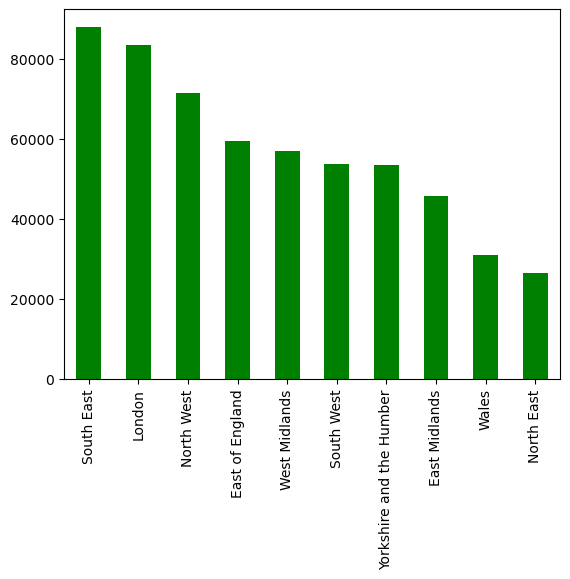

In [13]:
data['Region'].value_counts().plot(kind='bar',color='green')

In [14]:
Residencetype_mapping={'C':'Resident in a communal establishment','H':'Not resident in a communal establishment'}
data['Residence Type']= data['Residence Type'].replace(Residencetype_mapping)

In [15]:
data['Residence Type'].describe()
#This is a nominal attribute with only two states so it is Binary in nature.To be more precise it is a Assymetric binary attribute.

count                                       569740
unique                                           2
top       Not resident in a communal establishment
freq                                        559086
Name: Residence Type, dtype: object

<Axes: >

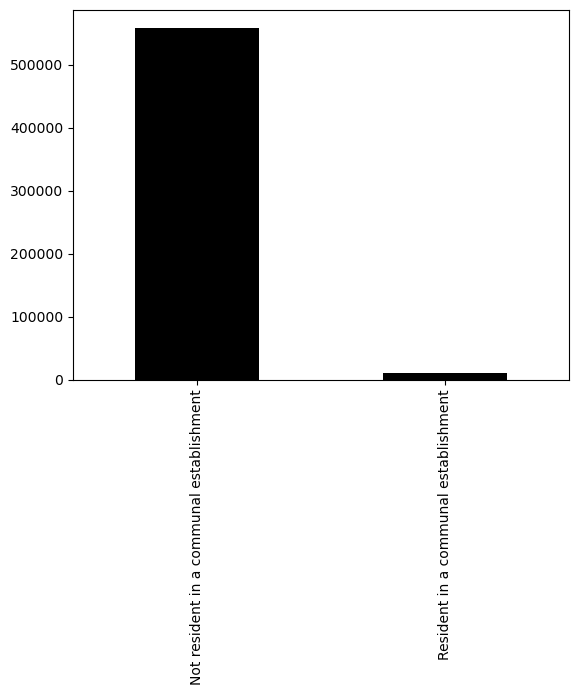

In [16]:
data['Residence Type'].value_counts().plot(kind='bar',color='Black')
# This a bar graph representation of the attribute Residence type.
# Here we can see that 'H' which was transformed as '1' has the maximum amount of counts in the data and the Residence type 'C' which was converted to '0' has avery little count as compared to 1.

In [17]:
Familycomposition_mapping={1: 'Not in a family', 2: 'Married/same-sex civil partnership couple family', 3: 'Cohabiting couple family', 4: 'Lone parent family (male head)', 5: 'Lone parent family (female head)',6:'Other related family',-9:'No code required'}
data['Family Composition']= data['Family Composition'].replace(Familycomposition_mapping)

In [18]:
data['Family Composition']

0         Married/same-sex civil partnership couple family
1                                 Cohabiting couple family
2         Married/same-sex civil partnership couple family
3                                          Not in a family
4         Married/same-sex civil partnership couple family
                                ...                       
569735                                    No code required
569736                                    No code required
569737                                    No code required
569738    Married/same-sex civil partnership couple family
569739                                     Not in a family
Name: Family Composition, Length: 569740, dtype: object

In [19]:
data['Family Composition'].describe()

count                                               569740
unique                                                   7
top       Married/same-sex civil partnership couple family
freq                                                300961
Name: Family Composition, dtype: object

<Axes: ylabel='Family Composition'>

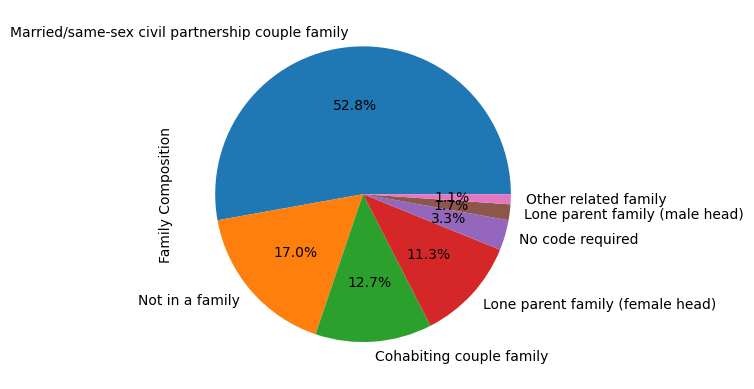

In [20]:
data['Family Composition'].value_counts().plot(kind='pie',autopct='%1.1f%%')
# Here it is clearly visible to us that majority of the section is coverd by type'2' category followed by '1'.

In [21]:
Populationbase_mapping={1:'Usual resident',2:'Student living away from home during term-time',3:'Short-term resident'}
data['Population Base']=data['Population Base'].replace(Populationbase_mapping)

In [22]:
data['Population Base'].describe()

count             569740
unique                 3
top       Usual resident
freq              561039
Name: Population Base, dtype: object

In [23]:
counts = data['Population Base'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: Usual resident                                    98.472812
Student living away from home during term-time     1.181241
Short-term resident                                0.345947
Name: Population Base, dtype: float64


In [24]:
Sex_mapping={1: 'Male', 2: 'Female'}
data['Sex']=data['Sex'].replace(Sex_mapping)

In [25]:
data['Sex'].describe()

count     569740
unique         2
top       Female
freq      289172
Name: Sex, dtype: object

In [26]:
counts = data['Sex'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: Female    50.755081
Male      49.244919
Name: Sex, dtype: float64


In [27]:
data['Sex'].value_counts()

Female    289172
Male      280568
Name: Sex, dtype: int64

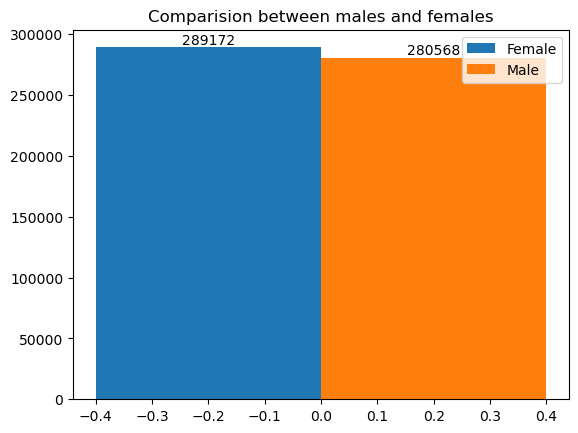

In [28]:
X = ['Sex'] 
female = [289172] 
male = [280568] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female') 
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male') 
for i in range(len(X)):
    plt.text(X_axis[i] - 0.2, female[i], str(female[i]), ha='center', va='bottom')
    plt.text(X_axis[i] + 0.2, male[i], str(male[i]), ha='center', va='bottom')
plt.title("Comparision between males and females")
plt.legend() 
plt.show() 
# This code will give us the comparison between males and females in the dataset.


In [29]:
Age_mapping={1:'0 to 15',2:'16 to 24',3:'25 to 34',4:'35 to 44',5:'45 to 54',6:'55 to 64',7:'65 to 74',8:'75 and over'}
data['Age']=data['Age'].replace(Age_mapping)

In [30]:
data['Age'].describe()

count      569740
unique          8
top       0 to 15
freq       106832
Name: Age, dtype: object

In [31]:
data['Age'].value_counts()

0 to 15        106832
35 to 44        78641
45 to 54        77388
25 to 34        75948
16 to 24        72785
55 to 64        65665
65 to 74        48777
75 and over     43704
Name: Age, dtype: int64

In [32]:
counts = data['Age'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: 0 to 15        18.751009
35 to 44       13.802963
45 to 54       13.583038
25 to 34       13.330291
16 to 24       12.775125
55 to 64       11.525433
65 to 74        8.561274
75 and over     7.670867
Name: Age, dtype: float64


<Axes: >

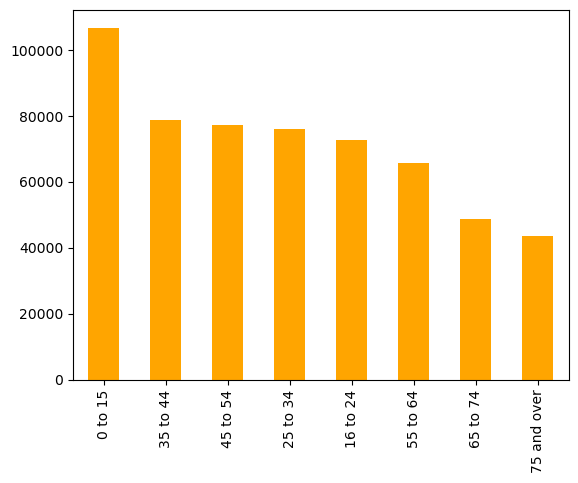

In [33]:
data['Age'].value_counts().plot(kind='bar',color='orange')

In [34]:
Maritalstatus_mapping={1: 'Single ', 2: 'Married', 3: 'Separated', 4: 'Divorced', 5: 'Widowed'}
data['Marital Status']=data['Marital Status'].replace(Maritalstatus_mapping)

In [35]:
data['Marital Status'].describe()
#This is a nominal kind of attribute. This attribute can be correlated with age.

count      569740
unique          5
top       Single 
freq       270999
Name: Marital Status, dtype: object

In [36]:
counts = data['Marital Status'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: Single       47.565381
Married      37.592411
Divorced      7.145891
Widowed       5.598694
Separated     2.097623
Name: Marital Status, dtype: float64


<Axes: >

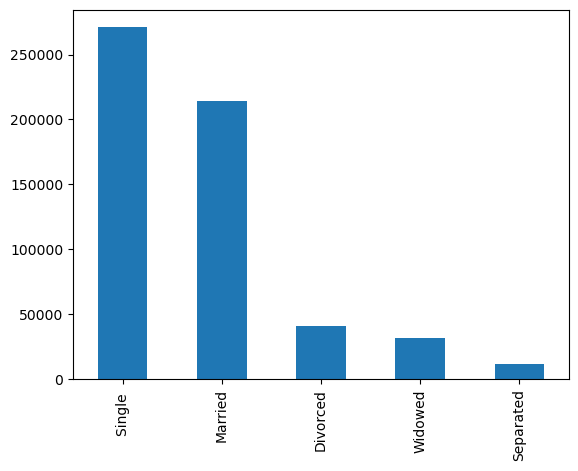

In [38]:
data['Marital Status'].value_counts().plot(kind= 'bar')

In [39]:
Student_mapping={1: 'Yes', 2: 'No'}
data['Student']=data['Student'].replace(Student_mapping)

In [40]:
data['Student'].describe()
#Here the student attribute is a Binary symmetric attribute since the only two outcomes are 1 or 2.

count     569740
unique         2
top           No
freq      443203
Name: Student, dtype: object

In [41]:
counts = data['Student'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: No     77.790396
Yes    22.209604
Name: Student, dtype: float64


<Axes: ylabel='Student'>

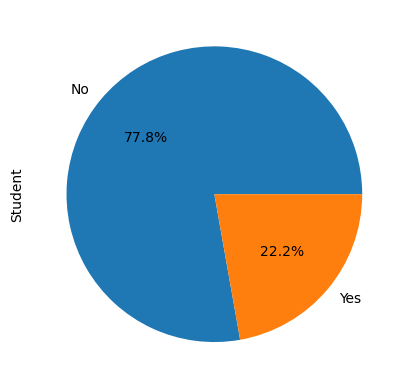

In [42]:
data['Student'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [43]:
Countryofbirth_mapping=  {1: 'UK', 2: 'Non-UK',-9:'No Code'}
data['Country of Birth']=data['Country of Birth'].replace(Countryofbirth_mapping)

In [44]:
data['Country of Birth'].describe()

count     569740
unique         3
top           UK
freq      485645
Name: Country of Birth, dtype: object

<Axes: ylabel='Country of Birth'>

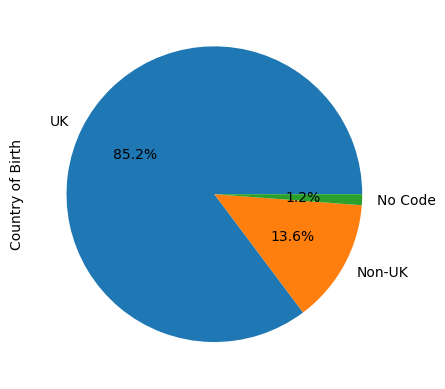

In [45]:
data['Country of Birth'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [46]:
Health_mapping={1: 'Very good health', 2: 'Good health', 3: 'Fair health',4:'Bad Health',5:'Very Bad Health',-9:'No Code'}
data['Health']=data['Health'].replace(Health_mapping)

In [47]:
data['Health'].describe()

count               569740
unique                   6
top       Very good health
freq                264971
Name: Health, dtype: object

In [48]:
counts = data['Health'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: Very good health    46.507354
Good health         33.654474
Fair health         13.072630
Bad Health           4.310387
Very Bad Health      1.260926
No Code              1.194229
Name: Health, dtype: float64


<Axes: >

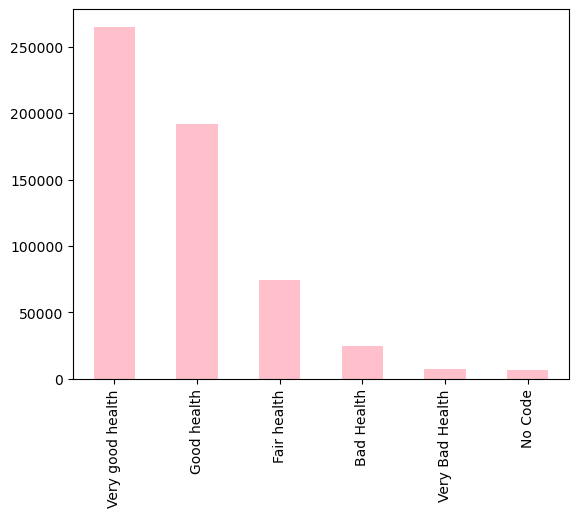

In [49]:
data['Health'].value_counts().plot(kind='bar',color='pink')

In [50]:
Ethnicgroup_mapping={1: 'White', 2: 'Mixed', 3: 'Asian/Asian British', 4: 'Black/Black British', 5: 'Chinese/Other ethnic group',-9:'No Code'}
data['Ethnic Group']=data['Ethnic Group'].replace(Ethnicgroup_mapping)

In [51]:
data['Ethnic Group'].describe()

count     569740
unique         6
top        White
freq      483477
Name: Ethnic Group, dtype: object

In [52]:
counts = data['Ethnic Group'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: White                         84.859234
Asian/Asian British            7.496577
Black/Black British            3.297294
Mixed                          2.142907
No Code                        1.194229
Chinese/Other ethnic group     1.009759
Name: Ethnic Group, dtype: float64


<Axes: >

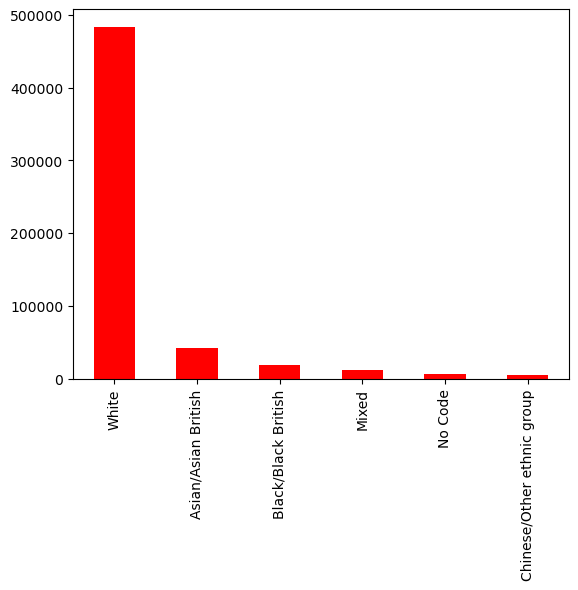

In [53]:
data['Ethnic Group'].value_counts().plot(kind='bar',color='red')

In [54]:
Religion_mapping={1:'No religion',2: 'Christian', 3: 'Buddhist', 4: 'Hindu', 5: 'Jewish', 6: 'Muslim', 7: 'Sikh', 8: 'Other religion', 9: 'Not stated',-9:'No Code'}
data['Religion']=data['Religion'].replace(Religion_mapping)

In [55]:
data['Religion'].describe()

count        569740
unique           10
top       Christian
freq         333481
Name: Religion, dtype: object

In [56]:
counts = data['Religion'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: Christian         58.532137
No religion       24.863622
Not stated         7.128339
Muslim             4.781128
Hindu              1.441535
No Code            1.194229
Sikh               0.739811
Jewish             0.451434
Buddhist           0.445466
Other religion     0.422298
Name: Religion, dtype: float64


<Axes: ylabel='Religion'>

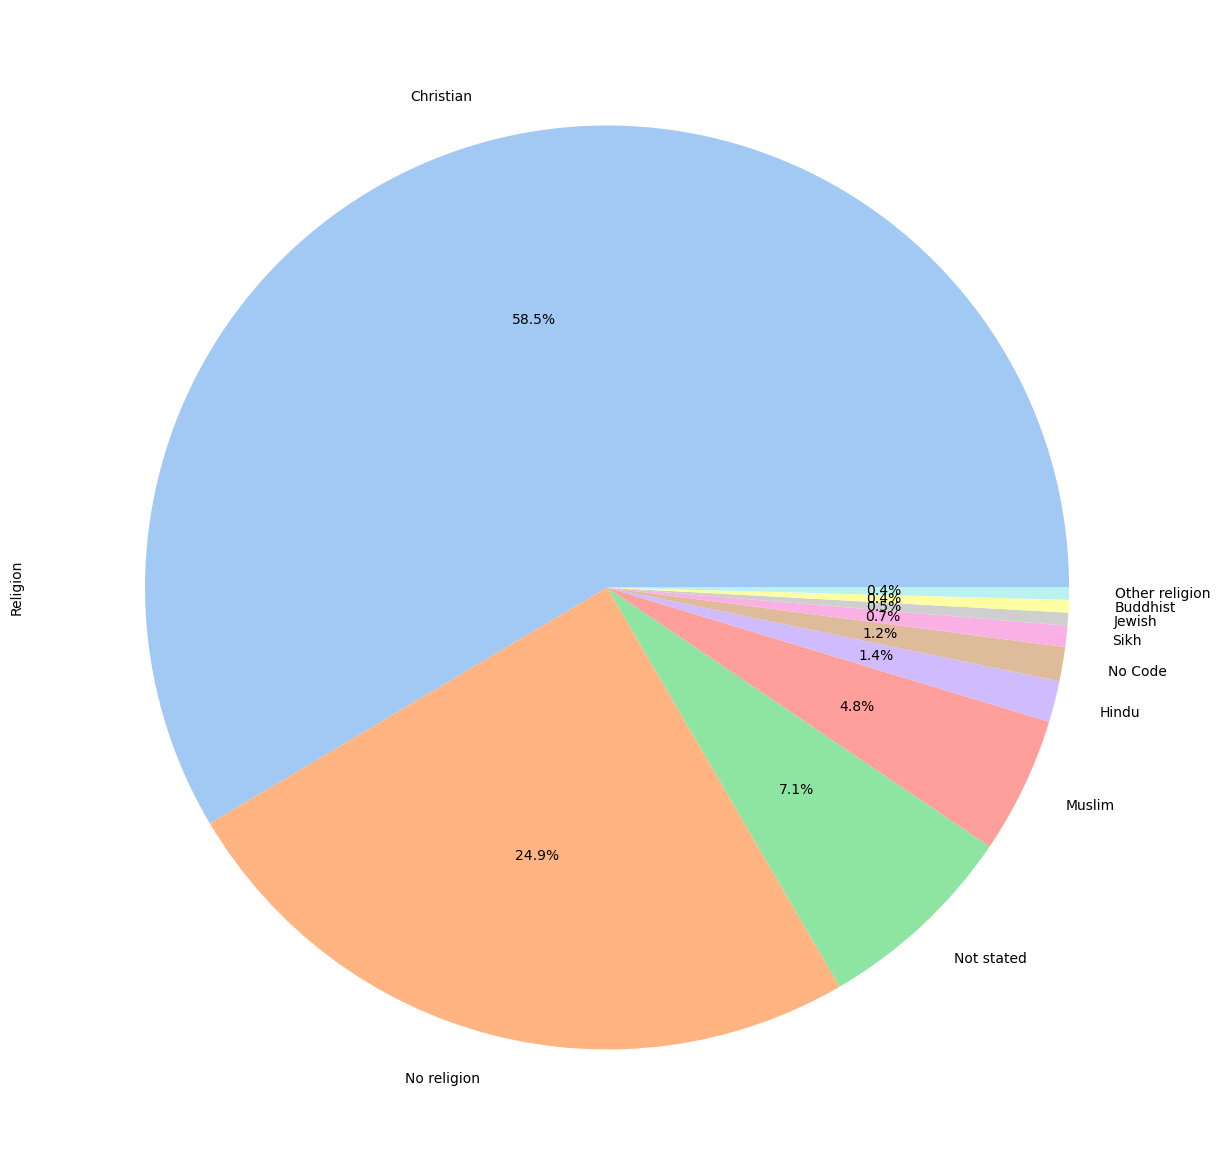

In [57]:
data['Religion'].value_counts().plot(kind='pie',figsize=(15,15),autopct='%1.1f%%',colors=sn.color_palette("pastel"))

In [58]:
Economicactivity_mapping= {1: 'Economically active:Employee', 2: 'Economically active:Self-employed',3:'Economically active: Unemployed',4:'Economically active: Full-time student',5:'Economically inactive: Retired',6:'Economically inactive: Student',7:'Economically inactive: Looking after home or family',8:'Economically inactive:disabled',9:'Economically inactive:Other',-9:'No Code'}
data['Economic Activity']=data['Economic Activity'].replace(Economicactivity_mapping)

In [59]:
data['Economic Activity'].describe()

count                           569740
unique                              10
top       Economically active:Employee
freq                            216024
Name: Economic Activity, dtype: object

In [60]:
data['Economic Activity'].value_counts()

Economically active:Employee                           216024
No Code                                                112618
Economically inactive: Retired                          97480
Economically active:Self-employed                       40632
Economically inactive: Student                          24756
Economically active: Unemployed                         18109
Economically inactive:disabled                          17991
Economically inactive: Looking after home or family     17945
Economically active: Full-time student                  14117
Economically inactive:Other                             10068
Name: Economic Activity, dtype: int64

In [61]:
counts = data['Economic Activity'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: Economically active:Employee                           37.916242
No Code                                                19.766560
Economically inactive: Retired                         17.109559
Economically active:Self-employed                       7.131674
Economically inactive: Student                          4.345140
Economically active: Unemployed                         3.178467
Economically inactive:disabled                          3.157756
Economically inactive: Looking after home or family     3.149682
Economically active: Full-time student                  2.477797
Economically inactive:Other                             1.767122
Name: Economic Activity, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Economically active:Employee'),
  Text(1, 0, 'No Code'),
  Text(2, 0, 'Economically inactive: Retired'),
  Text(3, 0, 'Economically active:Self-employed'),
  Text(4, 0, 'Economically inactive: Student'),
  Text(5, 0, 'Economically active: Unemployed'),
  Text(6, 0, 'Economically inactive:disabled'),
  Text(7, 0, 'Economically inactive: Looking after home or family'),
  Text(8, 0, 'Economically active: Full-time student'),
  Text(9, 0, 'Economically inactive:Other')])

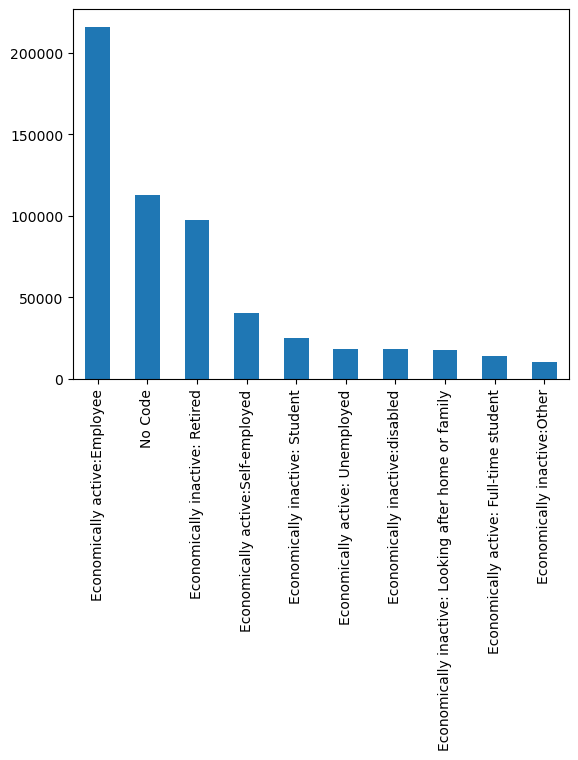

In [62]:
data['Economic Activity'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)

In [63]:
Occupation_mapping= {1: 'Managers, directors and senior officials', 2: 'Professional occupations', 3: 'Associate professional and technical occupations', 4: 'Administrative and secretarial occupations', 5: 'Skilled trades occupations', 6: 'Caring, leisure and other service occupations', 7: 'Sales and customer service occupations', 8: 'Process, plant and machine operatives', 9: 'Elementary occupations', -9: 'No Code'}
data['Occupation']=data['Occupation'].replace(Occupation_mapping)

In [64]:
data['Occupation'].describe()

count      569740
unique         10
top       No Code
freq       149984
Name: Occupation, dtype: object

In [65]:
counts = data['Occupation'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: No Code                                             26.324990
Professional occupations                            11.252677
Elementary occupations                              10.264858
Administrative and secretarial occupations           9.347071
Skilled trades occupations                           8.520729
Associate professional and technical occupations     7.887282
Managers, directors and senior officials             6.983536
Sales and customer service occupations               6.761505
Caring, leisure and other service occupations        6.546319
Process, plant and machine operatives                6.111033
Name: Occupation, dtype: float64


<Axes: >

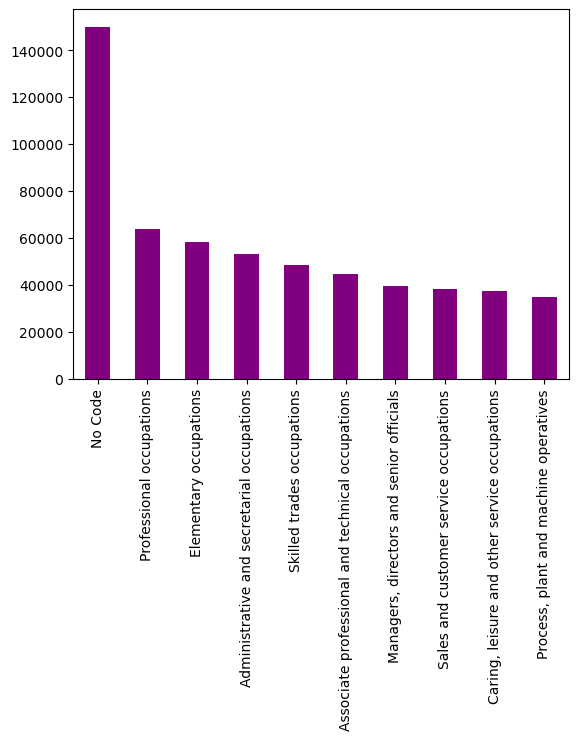

In [66]:
data['Occupation'].value_counts().plot(kind='bar',color='purple')

In [67]:
Industry_mapping={1: 'Agriculture, forestry and fishing', 2: 'Mining and quarrying', 3: 'Construction', 4: 'Wholesale and retail Trade', 5: 'Accomodation and food', 6: 'Transport and storage', 7: 'Financial and insurance', 8: 'Real estate activities', 9: 'Public administration and defence',10:'Education',11:'Human health and social work',12:'Other activities', -9: 'No code'}
data['Industry']=data['Industry'].replace(Industry_mapping)

In [68]:
data['Industry'].value_counts()

No code                              149984
Wholesale and retail Trade            68878
Mining and quarrying                  53433
Real estate activities                49960
Human health and social work          49345
Education                             40560
Transport and storage                 35240
Construction                          30707
Accomodation and food                 25736
Public administration and defence     24908
Other activities                      20256
Financial and insurance               16776
Agriculture, forestry and fishing      3957
Name: Industry, dtype: int64

In [69]:
data['Industry'].describe()

count      569740
unique         13
top       No code
freq       149984
Name: Industry, dtype: object

In [70]:
counts = data['Industry'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: No code                              26.324990
Wholesale and retail Trade           12.089374
Mining and quarrying                  9.378488
Real estate activities                8.768912
Human health and social work          8.660968
Education                             7.119037
Transport and storage                 6.185277
Construction                          5.389651
Accomodation and food                 4.517148
Public administration and defence     4.371819
Other activities                      3.555306
Financial and insurance               2.944501
Agriculture, forestry and fishing     0.694527
Name: Industry, dtype: float64


<Axes: ylabel='Industry'>

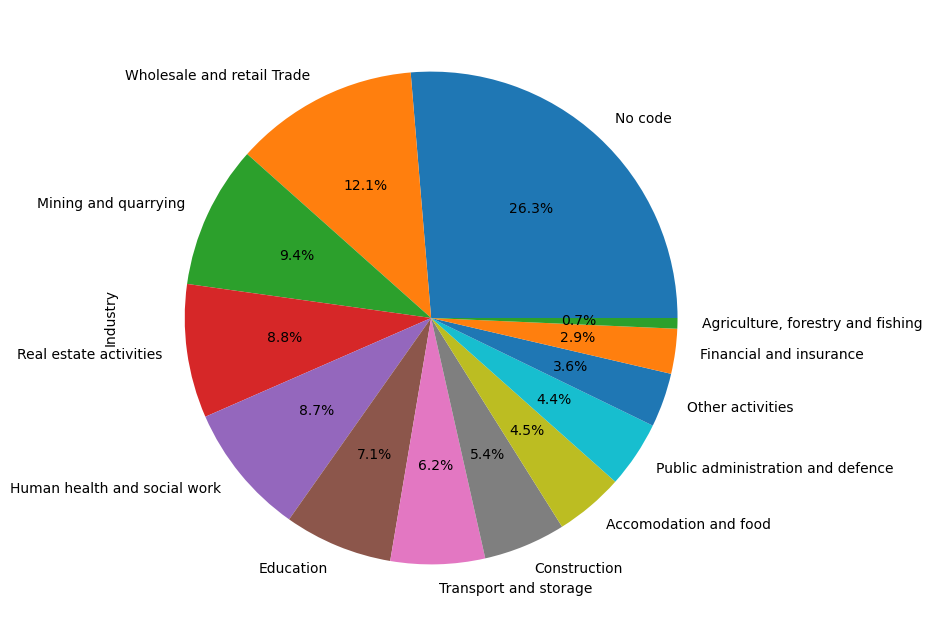

In [71]:
data['Industry'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%')

In [72]:
Hoursworkedperweek_mapping={1:'Part time:<15 hours',2:'Part time:16-30 hours',3:'Full time:31-48 hours',4:'Full time:>49 hours',-9:'No Code'}
data['Hours worked per week']=data['Hours worked per week'].replace(Hoursworkedperweek_mapping)

In [73]:
data['Hours worked per week'].describe()

count      569740
unique          5
top       No Code
freq       302321
Name: Hours worked per week, dtype: object

<Axes: ylabel='Hours worked per week'>

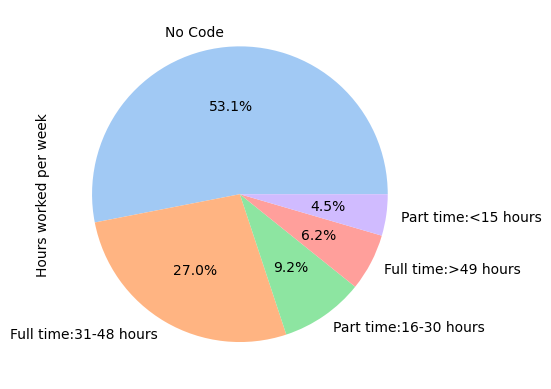

In [74]:
data['Hours worked per week'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=sn.color_palette("pastel"))

In [75]:
Approximatedsocialgrade_mapping={1: 'AB', 2: 'C1', 3: 'C2', 4: 'DE', -9: 'No Code'}
data['Approximated Social Grade']=data['Approximated Social Grade'].replace(Approximatedsocialgrade_mapping)

In [76]:
data['Approximated Social Grade'].describe()

count     569740
unique         5
top           C1
freq      159642
Name: Approximated Social Grade, dtype: object

In [77]:
counts = data['Approximated Social Grade'].value_counts()
category_percentages = (counts / counts.sum()) * 100
print("Category Percentages:",category_percentages)

Category Percentages: C1         28.020150
No Code    21.782392
DE         21.718503
AB         14.448696
C2         14.030259
Name: Approximated Social Grade, dtype: float64


<Axes: >

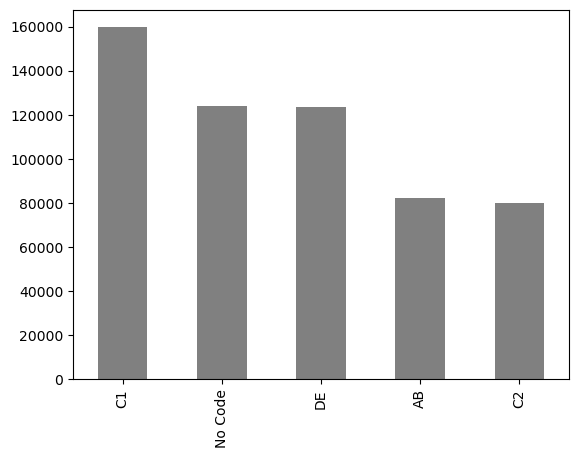

In [78]:
data['Approximated Social Grade'].value_counts().plot(kind='bar',color='grey')

In [79]:
data['No of hours']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
569735    52.0
569736    55.0
569737    49.0
569738    53.0
569739    54.0
Name: No of hours, Length: 569740, dtype: float64

In [80]:
data['No of hours'].describe()

count    267419.000000
mean         35.234789
std          13.520881
min           1.000000
25%          27.000000
50%          37.000000
75%          45.000000
max          60.000000
Name: No of hours, dtype: float64

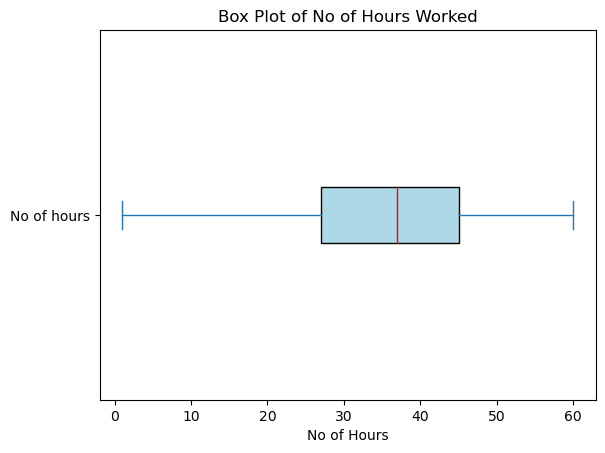

In [81]:
data['No of hours'].plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.xlabel('No of Hours')
plt.title('Box Plot of No of Hours Worked')
plt.show()
# We plot the box plot for this with the missing values to see the efect.

<Axes: >

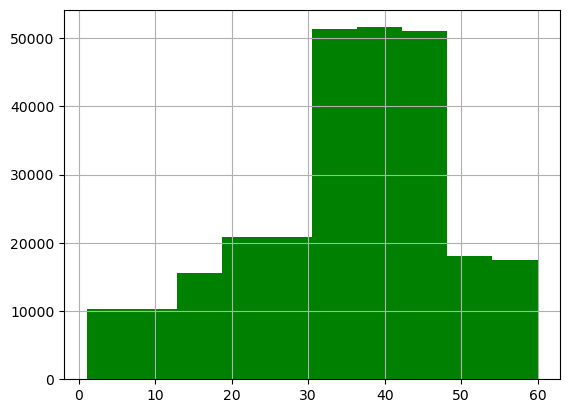

In [84]:
data['No of hours'].hist(color='green')

In [82]:
data.mode()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394483,South East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,0 to 15,Single,No,UK,Very good health,White,Christian,Economically active:Employee,No Code,No code,No Code,41.0,C1
1,7394484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7394485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7394486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7394487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7964219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569736,7964220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569737,7964221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569738,7964222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
data.to_csv('data_categorical.csv')

# SOME CROSS TABULATIONS AND VISUALIZATIONS BETWEEN TWO ATTRIBUTES.

In [92]:
crosstab2 = pd.crosstab(data['Age'], data['Marital Status'])
crosstab2

Marital Status,Divorced,Married,Separated,Single,Widowed
Age,,,,,
0 to 15,1,9,0,106821,1
16 to 24,105,2051,151,70420,58
25 to 34,1992,24998,1808,47020,130
35 to 44,7981,43136,3612,23519,393
45 to 54,12521,47454,3416,12714,1283
55 to 64,10263,44647,1834,5472,3449
65 to 74,5517,32737,812,2678,7033
75 and over,2333,19147,318,2355,19551


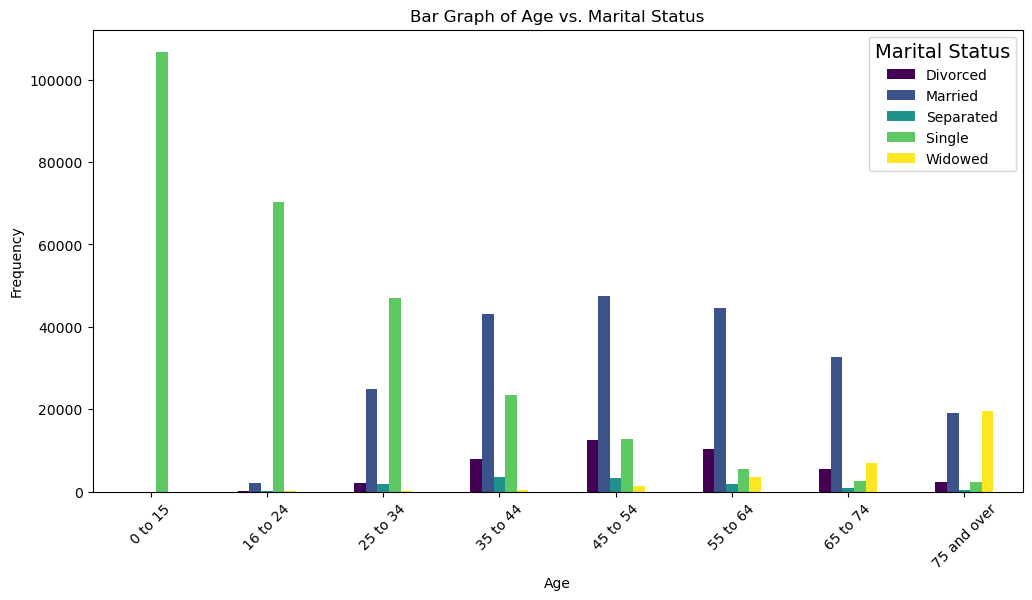

In [93]:
crosstab2 = pd.crosstab(data['Age'], data['Marital Status'])
crosstab2.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Bar Graph of Age vs. Marital Status')
plt.legend(title='Marital Status', title_fontsize='14')
plt.xticks(rotation=45)
plt.show()


In [95]:
crossdata1= pd.crosstab(data['Sex'], data['Health'])
crossdata1

Health,Bad Health,Fair health,Good health,No Code,Very Bad Health,Very good health
Sex,,,,,,
Female,13191,40121,98383,3371,3795,130311
Male,11367,34359,93360,3433,3389,134660


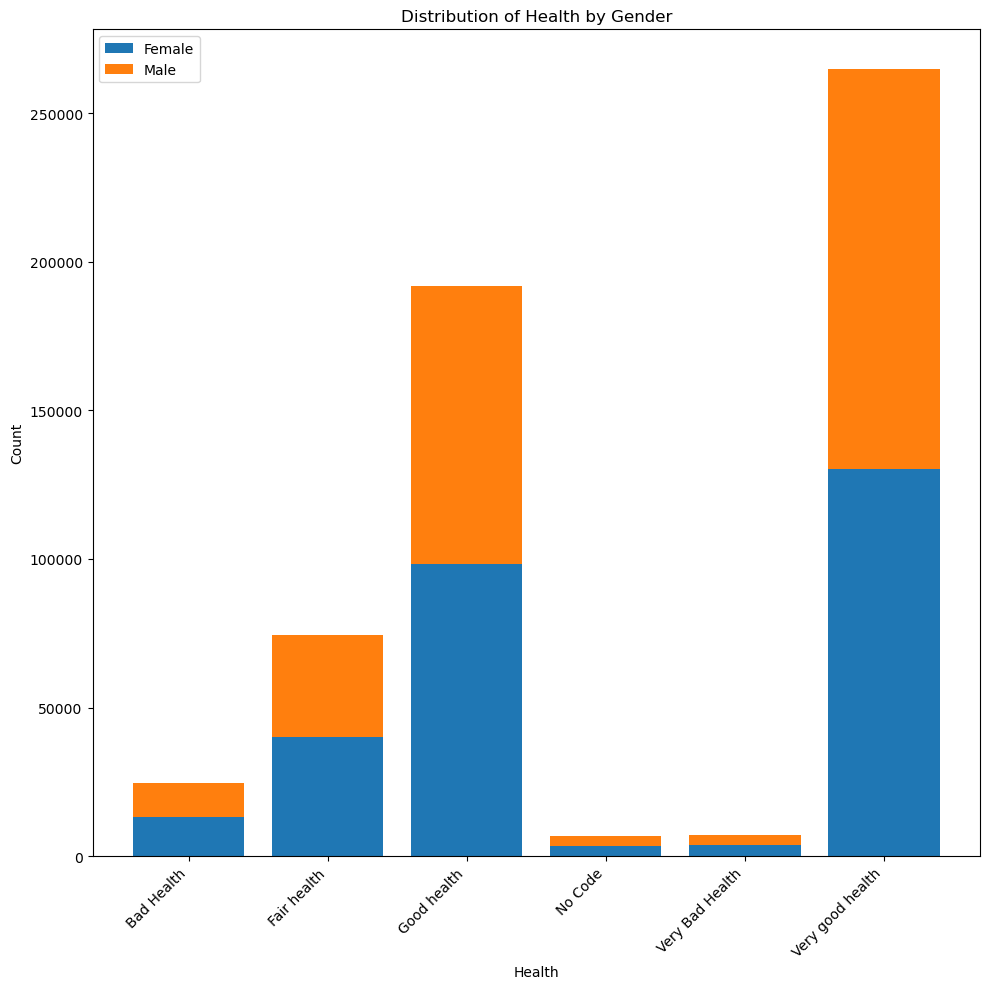

In [96]:
data_1 = {
    'Health': ['Bad Health', 'Fair health', 'Good health', 'No Code', 'Very Bad Health', 'Very good health'],
    'Female': [13191, 40121, 98383, 3371, 3795, 130311],
    'Male': [11367, 34359, 93360, 3433, 3389, 134660]
}

df = pd.DataFrame(data_1)
fig, ax = plt.subplots(figsize=(10, 10))
bottom = [0] * len(df['Health'])
for gender in ['Female', 'Male']:
    ax.bar(df['Health'], df[gender], label=gender, bottom=bottom)
    bottom = [bottom[i] + df[gender][i] for i in range(len(df['Health']))]

ax.set_xlabel('Health')
ax.set_ylabel('Count')
ax.set_title('Distribution of Health by Gender')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [102]:
# Student vs No of hours

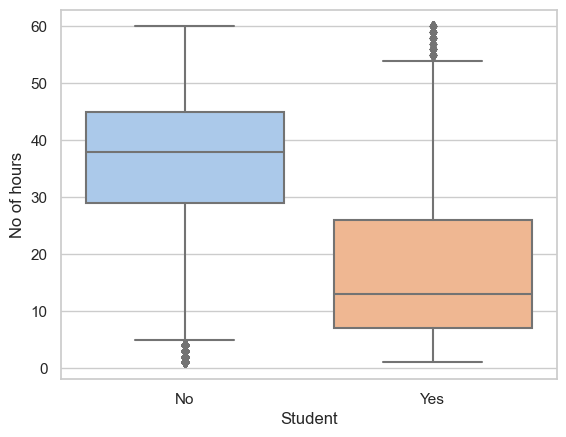

<Figure size 2000x1000 with 0 Axes>

In [103]:
sn.boxplot(x='Student', y='No of hours', data=data,palette='pastel')
sn.set(style="whitegrid")
plt.figure(figsize=(20, 10))
plt.show()

# SOME CROSS TABULATIONS AND VISUALIZATIONS BETWEEN THREE ATTRIBUTES.

In [98]:
crosstab_table=pd.crosstab([data['Residence Type'],data['Marital Status']],data['Ethnic Group'])
crosstab_table

Ethnic Group                                             Asian/Asian British  \
Residence Type                           Marital Status                        
Not resident in a communal establishment Divorced                       1128   
                                         Married                       18421   
                                         Separated                       780   
                                         Single                        20130   
                                         Widowed                        1107   
Resident in a communal establishment     Divorced                         11   
                                         Married                          66   
                                         Separated                        16   
                                         Single                         1038   
                                         Widowed                          14   

Ethnic Group                                             Black/Black British  \
Residence Type                           Marital Status                        
Not resident in a communal establishment Divorced                       1100   
                                         Married                        4537   
                                         Separated                       876   
                                         Single                        11383   
                                         Widowed                         503   
Resident in a communal establishment     Divorced                         17   
                                         Married                          36   
                                         Separated                        11   
                                         Single                          315   
                                         Widowed                           8   

Ethnic Group                                             Chinese/Other ethnic group  \
Residence Type                           Marital Status                               
Not resident in a communal establishment Divorced                               265   
                                         Married                               2176   
                                         Separated                              178   
                                         Single                                2904   
                                         Widowed                                129   
Resident in a communal establishment     Divorced                                 5   
                                         Married                                  8   
                                         Separated                                2   
                                         Single                                  81   
                                         Widowed                                  5   

Ethnic Group                                             Mixed  No Code  \
Residence Type                           Marital Status                   
Not resident in a communal establishment Divorced          420        7   
                                         Married          1699       28   
                                         Separated         203        8   
                                         Single           9515     6624   
                                         Widowed           125        1   
Resident in a communal establishment     Divorced            3        2   
                                         Married            15        0   
                                         Separated           3        0   
                                         Single            221      134   
                                         Widowed             5        0   

Ethnic Group                                              White  
Residence Type                           Marital Status          


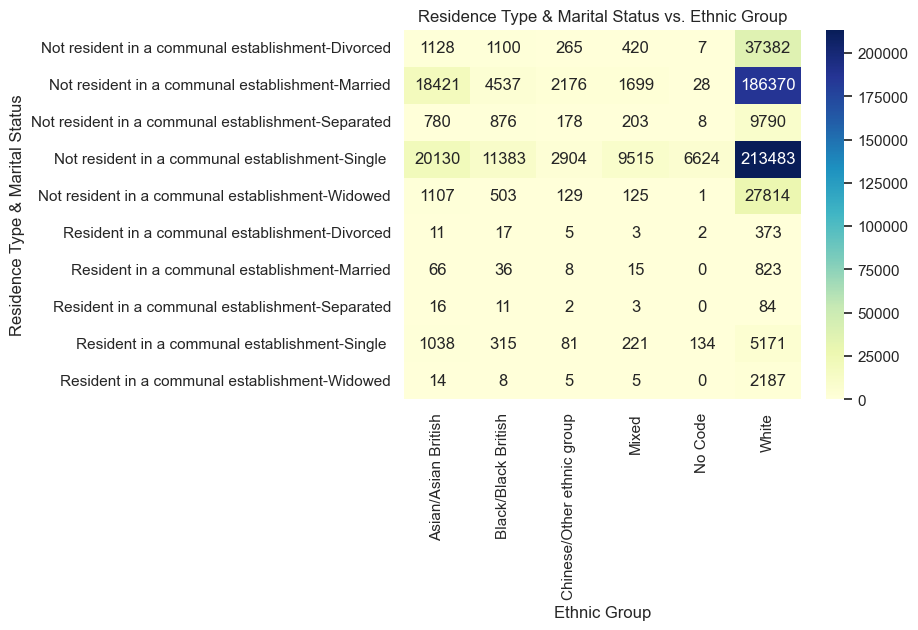

In [99]:
sn.heatmap(crosstab_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Residence Type & Marital Status vs. Ethnic Group')
plt.xlabel('Ethnic Group')
plt.ylabel('Residence Type & Marital Status')
plt.show()

In [104]:
crosstab5 = pd.crosstab(data['Student'],data['Approximated Social Grade'])
crosstab5

Approximated Social Grade,AB,C1,C2,DE,No Code
Student,,,,,
No,82310,126370,79912,123668,30943
Yes,10,33272,24,71,93160


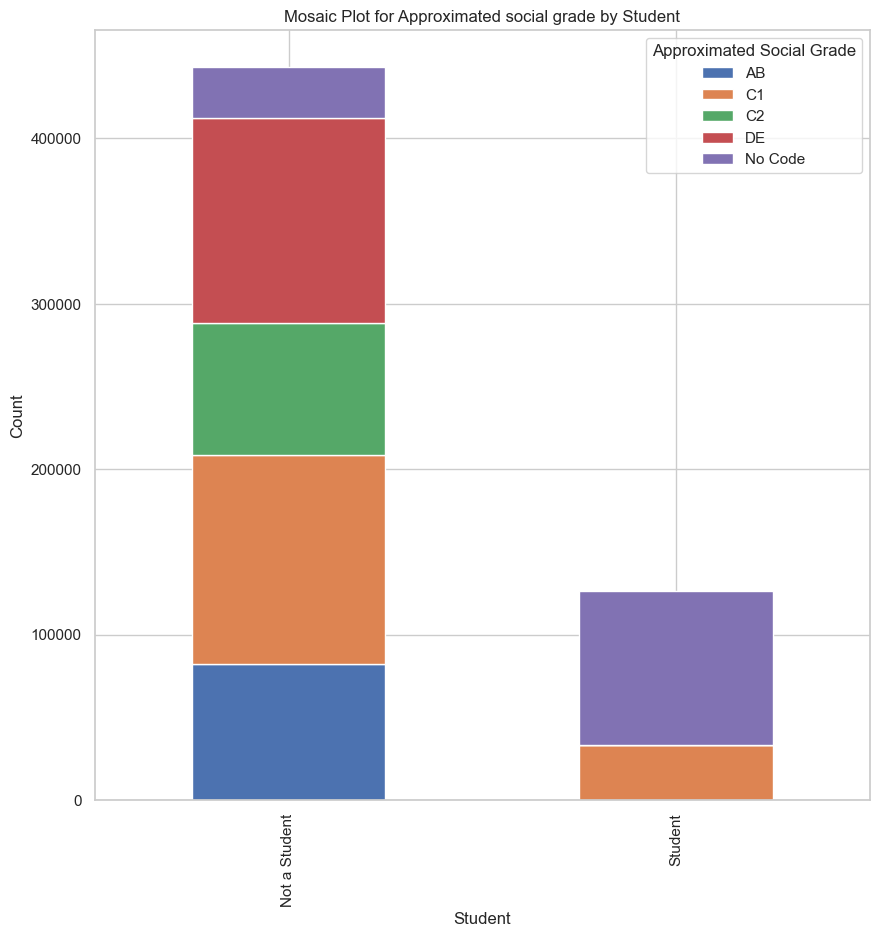

In [105]:
data_mosaic = {
    'Approximated Social Grade': ['AB', 'C1', 'C2', 'DE', 'No Code'],
    'Not a Student': [82310,126370,79912,123668,30943],
    'Student': [10,33272,24,71,93160]
}
df = pd.DataFrame(data_mosaic)
df.set_index('Approximated Social Grade', inplace=True)

# Createing a mosaic plot
fig, ax = plt.subplots(figsize=(10, 10)) 
df.T.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Student')
plt.ylabel('Count')
plt.title('Mosaic Plot for Approximated social grade by Student')
plt.legend(title='Approximated Social Grade')
plt.show()


In [106]:
data.to_csv('data_categorical.csv')

# CORRELATIONS

# Calculation of Correlation of attributes with approximate social grade to see which are highly correlated.

In [107]:
# We create a function to calculate the correlation between Approximated social grade and other attributes.
def correlation(data, attribute1, attribute2): # Defining a function with attribute 1 as the fixed function i.e Approximated Social Grade.
    contingency = pd.crosstab(data[attribute1], data[attribute2])# Here we create a crosstab by using pandas

    chi2, p, dof, expected = chi2_contingency(contingency) # Here we apply chi square test of correlation
    n = contingency.sum().sum()
    V = (chi2 / (n * (min(contingency.shape) - 1)))**0.5 # Here we apply the cramers V function

    print(f"Fixed Attribute: {attribute1}")
    print(f"Variable Attribute: {attribute2}")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Cramer's V:", V)
    print("\n")


# Call the function with 'Approximated Social Grade' as the variable attribute
correlation(data, 'Approximated Social Grade', 'Region')
correlation(data, 'Approximated Social Grade', 'Residence Type')
correlation(data, 'Approximated Social Grade', 'Family Composition')
correlation(data, 'Approximated Social Grade', 'Population Base')
correlation(data, 'Approximated Social Grade', 'Age')
correlation(data, 'Approximated Social Grade', 'Sex')
correlation(data, 'Approximated Social Grade', 'Marital Status')
correlation(data, 'Approximated Social Grade', 'Student')
correlation(data, 'Approximated Social Grade', 'Country of Birth')
correlation(data, 'Approximated Social Grade', 'Health')
correlation(data, 'Approximated Social Grade', 'Ethnic Group')
correlation(data, 'Approximated Social Grade', 'Religion')
correlation(data, 'Approximated Social Grade', 'Economic Activity')
correlation(data, 'Approximated Social Grade', 'Occupation')
correlation(data, 'Approximated Social Grade', 'Industry')
correlation(data, 'Approximated Social Grade', 'Hours worked per week')


Fixed Attribute: Approximated Social Grade
Variable Attribute: Region
Chi-Square Statistic: 6173.679924239861
P-value: 0.0
Cramer's V: 0.05204795896479211


Fixed Attribute: Approximated Social Grade
Variable Attribute: Residence Type
Chi-Square Statistic: 38986.09603880629
P-value: 0.0
Cramer's V: 0.26158721763676535


Fixed Attribute: Approximated Social Grade
Variable Attribute: Family Composition
Chi-Square Statistic: 115396.87605715745
P-value: 0.0
Cramer's V: 0.2250239141770787


Fixed Attribute: Approximated Social Grade
Variable Attribute: Population Base
Chi-Square Statistic: 31728.664318402927
P-value: 0.0
Cramer's V: 0.16686780051381794


Fixed Attribute: Approximated Social Grade
Variable Attribute: Age
Chi-Square Statistic: 514028.38522910693
P-value: 0.0
Cramer's V: 0.4749251840048835


Fixed Attribute: Approximated Social Grade
Variable Attribute: Sex
Chi-Square Statistic: 12403.83717263167
P-value: 0.0
Cramer's V: 0.147550155880718


Fixed Attribute: Approximated Social

# Anova Test to see Correlation between Industry and Hours worked per week.

In [104]:
crosstab3= pd.crosstab(data['Industry'],data['Hours worked per week'])
crosstab3

Hours worked per week,Full time:31-48 hours,Full time:>49 hours,No Code,Part time:16-30 hours,Part time:<15 hours
Industry,,,,,
Accomodation and food,5577,1979,10677,4552,2951
"Agriculture, forestry and fishing",882,1076,1476,316,207
Construction,13681,3954,10264,1848,960
Education,12183,3388,13953,6945,4091
Financial and insurance,7824,2027,5107,1383,435
Human health and social work,18391,2263,15809,10041,2841
Mining and quarrying,20658,3775,25783,2210,1007
No code,0,0,149984,0,0
Other activities,6403,1420,6903,3411,2119


In [109]:
# Here I have taken the crosstab data from above and arranged it in a dictionary format and then performed one way analysis of Variance which is a test of testing the hypothesis.
from scipy import stats
data_anova = {
    "Industry": [
        "Accomodation and food", "Agriculture, forestry and fishing", "Construction", "Education", "Financial and insurance",
        "Human health and social work", "Mining and quarrying", "No code", "Other activities", "Public administration and defence",
        "Real estate activities", "Transport and storage", "Wholesale and retail Trade"
    ],
    "Full time:31-48 hours": [5577, 882, 13681, 12183, 7824, 18391, 20658, 0, 6403, 11492, 20162, 15318, 21366],
    "Full time:>49 hours": [1979, 1076, 3954, 3388, 2027, 2263, 3775, 0, 1420, 1597, 5079, 4374, 4641],
    "No Code": [10677, 1476, 10264, 13953, 5107, 15809, 25783, 149984, 6903, 8883, 15518, 11474, 26490],
    "Part time:16-30 hours": [4552, 316, 1848, 6945, 1383, 10041, 2210, 0, 3411, 2280, 5959, 2878, 10310],
    "Part time:<15 hours": [2951, 207, 960, 4091, 435, 2841, 1007, 0, 2119, 656, 3242, 1196, 6071]
}

# Here I transformed the wide form dataframe into long form one by using 'melt' from pandas library.
df = pd.melt(pd.DataFrame(data_anova), id_vars=["Industry"], var_name="Hours worked per week", value_name="Value")

# Performing one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[df[df["Hours worked per week"] == category]["Value"] for category in df["Hours worked per week"].unique()])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Here I have set the significance level(Alpha) to 0.5 which is the standard level which means we will accept or reject our null hypothesis at 5% Level of significance.
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in hours worked and between industry worked.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in hours worked and between industry worked.")


F-statistic: 3.35227168104731
P-value: 0.015261931192432665
Reject the null hypothesis: There are significant differences in hours worked and between industry worked.


# Correlation between No of hours and other attributes

In [110]:
# Using Anova with Eta- Squared test as one attribute is numeric and other is categorical

In [3]:
data_corr= pd.read_csv('data_categorical.csv')

In [4]:
data_corr['No of hours'].fillna(0,inplace=True)
data_corr

,Unnamed: 0,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,0,7394816,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,55 to 64,Married,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, plant and machine operatives",Mining and quarrying,No Code,0.0,DE
1,1,7394832,North East,Not resident in a communal establishment,Cohabiting couple family,Usual resident,Female,0 to 15,Single,No,UK,Good health,White,No religion,No Code,No Code,No code,No Code,0.0,No Code
2,2,7394719,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,65 to 74,Married,No,UK,Very good health,White,Christian,Economically inactive: Retired,"Process, plant and machine operatives",Mining and quarrying,No Code,0.0,C1
3,3,7394840,North East,Not resident in a communal establishment,Not in a family,Usual resident,Female,55 to 64,Divorced,No,UK,Fair health,White,Christian,Economically inactive: Retired,Elementary occupations,Accomodation and food,No Code,0.0,DE
4,4,7394711,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,0 to 15,Single,Yes,UK,Very good health,White,No religion,No Code,No Code,No code,No Code,0.0,No Code
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,569735,7680019,South East,Resident in a communal establishment,No code required,Usual resident,Male,16 to 24,Single,No,Non-UK,Very good health,White,Christian,Economically active:Employee,Associate professional and technical occupations,Public administration and defence,Full time:>49 hours,52.0,No Code
569736,569736,7675184,South East,Resident in a communal establishment,No code required,Usual resident,Male,25 to 34,Single,No,Non-UK,Good health,Mixed,No religion,Economically active:Employee,"Managers, directors and senior officials",Accomodation and food,Full time:>49 hours,55.0,No Code
569737,569737,7675176,South East,Resident in a communal establishment,No code required,Usual resident,Female,45 to 54,Married,No,UK,Very good health,White,Christian,Economically active:Self-employed,"Managers, directors and senior officials",Real estate activities,Full time:>49 hours,49.0,No Code
569738,569738,7944614,Wales,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,55 to 64,Married,No,UK,Fair health,White,No religion,Economically active:Employee,"Caring, leisure and other service occupations",Education,Full time:>49 hours,53.0,C2


In [5]:
# We import f_oneway for one way anova calculation
from scipy.stats import f_oneway

numeric = data_corr['No of hours'] 

categorical_attributes = ['Region', 'Residence Type', 'Family Composition', 'Population Base', 'Sex', 'Age', 'Marital Status',
                           'Student', 'Country of Birth', 'Health', 'Ethnic Group', 'Religion', 'Economic Activity',
                           'Occupation', 'Industry', 'Approximated Social Grade']  # Mentioning all the rest categorical attributes

# Creating a empty dictionary to store values.
eta_squared_dict = {}

# Defining a function and using it as a loop to run the similar test again and again for all the categorical attributes.
for attribute in categorical_attributes:
    categorical = data_corr[attribute]

    f_statistic, p_value = f_oneway(*[numeric[categorical == category] for category in categorical.unique()]) 
    # Calculating the eta-squared which is used to measure the correlation between a numeric and a categorical attribute.
    eta_squared = f_statistic / (f_statistic + (len(data_corr) - 1))

    eta_squared_dict[attribute] = eta_squared

    print(f"\nAttribute: {attribute}")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
    print("Eta-squared (η²):", eta_squared)
    print("=" * 50)

sort = sorted(eta_squared_dict.items(), key=lambda x: x[1], reverse=True)  # making use of the sorted function to sort the values from high to low.
print("\nCategorical Attributes Sorted by Eta-squared:")
for attribute, eta_squared in sort:
    print(f"{attribute}: {eta_squared}")



Attribute: Region
F-statistic: 89.31290770350213
P-value: 4.236523561047043e-167
Eta-squared (η²): 0.0001567365216511598

Attribute: Residence Type
F-statistic: 3657.4822920202805
P-value: 0.0
Eta-squared (η²): 0.006378627014592657

Attribute: Family Composition
F-statistic: 3531.0940831855028
P-value: 0.0
Eta-squared (η²): 0.006159564435037694

Attribute: Population Base
F-statistic: 2500.129166137139
P-value: 0.0
Eta-squared (η²): 0.004369028678238605

Attribute: Sex
F-statistic: 13665.454388758744
P-value: 0.0
Eta-squared (η²): 0.023423637385621674

Attribute: Age
F-statistic: 50932.98256583267
P-value: 0.0
Eta-squared (η²): 0.0820610306192295

Attribute: Marital Status
F-statistic: 11042.70650655906
P-value: 0.0
Eta-squared (η²): 0.01901352329601027

Attribute: Student
F-statistic: 111638.51179785503
P-value: 0.0
Eta-squared (η²): 0.16384237792540318

Attribute: Country of Birth
F-statistic: 3150.6922494208497
P-value: 0.0
Eta-squared (η²): 0.005499649045961754

Attribute: Health


# DATA PRE PROCESSING FOR CLASSIFICATION

In [212]:
data_classification=pd.read_csv('census.csv')
data_classification

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,-9
569736,7675184,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,-9
569737,7675176,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,-9
569738,7944614,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


In [213]:
# Selecting only the top 5 predictors who have high correlation with the target attribute 'Approximated social grade'

In [214]:
del data_classification['Person ID']
del data_classification['Region']
del data_classification['Residence Type']
del data_classification['Population Base']
del data_classification['Ethnic Group']
del data_classification['Religion']
del data_classification['No of hours']

In [215]:
data_classification

,Family Composition,Sex,Age,Marital Status,Student,Country of Birth,Health,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,2,2,6,2,2,1,2,5,8,2,-9,4
1,3,2,1,1,2,1,2,-9,-9,-9,-9,-9
2,2,1,7,2,2,1,1,5,8,2,-9,2
3,1,2,6,4,2,1,3,5,9,5,-9,4
4,2,1,1,1,1,1,1,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...
569735,-9,1,2,1,2,2,1,1,3,9,4,-9
569736,-9,1,3,1,2,2,2,1,1,5,4,-9
569737,-9,2,5,2,2,1,1,2,1,8,4,-9
569738,2,1,6,2,2,1,3,1,6,10,4,3


In [216]:
data_classification.replace(-9,0,inplace=True)

In [217]:
data_classification

,Family Composition,Sex,Age,Marital Status,Student,Country of Birth,Health,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,2,2,6,2,2,1,2,5,8,2,0,4
1,3,2,1,1,2,1,2,0,0,0,0,0
2,2,1,7,2,2,1,1,5,8,2,0,2
3,1,2,6,4,2,1,3,5,9,5,0,4
4,2,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
569735,0,1,2,1,2,2,1,1,3,9,4,0
569736,0,1,3,1,2,2,2,1,1,5,4,0
569737,0,2,5,2,2,1,1,2,1,8,4,0
569738,2,1,6,2,2,1,3,1,6,10,4,3


In [218]:
# Reducing the dataset and taking a subset out by grouping them with our target attribute 'Approximated Social Grade'
data_classification_sample=data_classification.groupby('Approximated Social Grade', group_keys=False).apply(lambda x: x.sample(frac=0.3))

In [219]:
data_classification_sample

,Family Composition,Sex,Age,Marital Status,Student,Country of Birth,Health,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
299067,0,2,2,1,1,1,1,6,9,5,0,0
170553,2,1,1,1,1,1,2,0,0,0,0,0
88938,2,2,1,1,1,1,1,0,0,0,0,0
259270,3,2,1,1,1,1,1,0,0,0,0,0
261599,5,2,1,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200333,2,2,7,2,2,1,4,5,4,9,0,4
133622,2,2,7,2,2,1,2,5,9,10,0,4
85034,1,2,7,5,2,1,4,5,9,4,0,4
287379,2,2,6,2,2,1,3,8,9,12,0,4


In [220]:
data_classification_sample.to_csv('data_classification_sample.csv')

# Classification 

# DECISION TREE

In [221]:
data_classification_sample0= pd.read_csv('data_classification_sample.csv')
del data_classification_sample0['Unnamed: 0']

In [222]:
data_classification_sample0

,Family Composition,Sex,Age,Marital Status,Student,Country of Birth,Health,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,0,2,2,1,1,1,1,6,9,5,0,0
1,2,1,1,1,1,1,2,0,0,0,0,0
2,2,2,1,1,1,1,1,0,0,0,0,0
3,3,2,1,1,1,1,1,0,0,0,0,0
4,5,2,1,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170918,2,2,7,2,2,1,4,5,4,9,0,4
170919,2,2,7,2,2,1,2,5,9,10,0,4
170920,1,2,7,5,2,1,4,5,9,4,0,4
170921,2,2,6,2,2,1,3,8,9,12,0,4


In [223]:
X = data_classification_sample0.iloc[:, :-1].values   # predictor attributes
y = data_classification_sample0.iloc[:, -1].values   # target attribute

In [224]:
data_classification_sample0.iloc[:,:-1].values

array([[ 0,  2,  2, ...,  9,  5,  0],
       [ 2,  1,  1, ...,  0,  0,  0],
       [ 2,  2,  1, ...,  0,  0,  0],
       ...,
       [ 1,  2,  7, ...,  9,  4,  0],
       [ 2,  2,  6, ...,  9, 12,  0],
       [ 1,  2,  7, ...,  5,  2,  0]], dtype=int64)

In [225]:
data_classification_sample0.iloc[:,-1].values

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [227]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion ='entropy', random_state= 0)

In [228]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [229]:
y_pred = DT.predict(X_test)
y_pred

array([4, 2, 4, ..., 2, 4, 4], dtype=int64)

In [230]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[18534,     0,     4,     2,     1],
       [    0,  8977,  2543,   339,   477],
       [    0,  3030, 18754,   806,  1359],
       [    0,   441,   858,  8306,  2414],
       [    0,   612,  1480,  2851, 13674]], dtype=int64)

<Axes: >

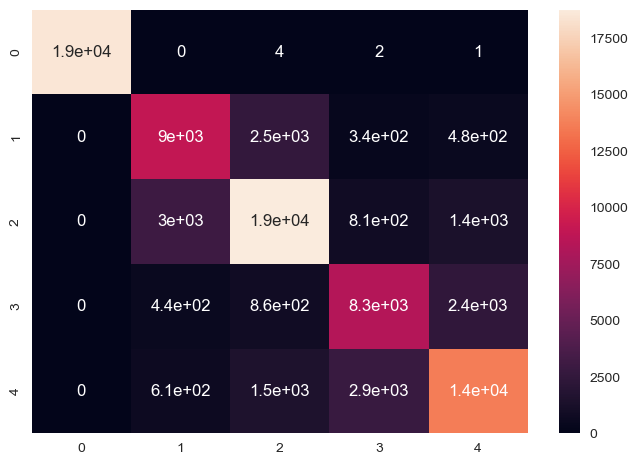

In [231]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [232]:
# print the Confusion Matrix in a DataFrame
from sklearn.metrics import confusion_matrix
unique_label = np.unique([y_test, y_pred])
cm=confusion_matrix(y_test, y_pred, labels=unique_label )
pd.DataFrame(cm, columns=unique_label)

,0,1,2,3,4
0,18534,0,4,2,1
1,0,8977,2543,339,477
2,0,3030,18754,806,1359
3,0,441,858,8306,2414
4,0,612,1480,2851,13674


In [233]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[18534     0     4     2     1]
 [    0  8977  2543   339   477]
 [    0  3030 18754   806  1359]
 [    0   441   858  8306  2414]
 [    0   612  1480  2851 13674]] 

Mean Absolute Error: 0.26941798694156466
Mean Squared Error: 0.4309400669303316
Root Mean Squared Error: 0.6564602554079962 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18541
           1       0.69      0.73      0.71     12336
           2       0.79      0.78      0.79     23949
           3       0.68      0.69      0.68     12019
           4       0.76      0.73      0.75     18617

    accuracy                           0.80     85462
   macro avg       0.78      0.79      0.79     85462
weighted avg       0.80      0.80      0.80     85462

Accuracy: 0.7985420420771805


# K Nearest Neighbour

In [234]:
data_classification_sample1= pd.read_csv('data_classification_sample.csv')
del data_classification_sample1['Unnamed: 0']

In [235]:
data_classification_sample1

,Family Composition,Sex,Age,Marital Status,Student,Country of Birth,Health,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,0,2,2,1,1,1,1,6,9,5,0,0
1,2,1,1,1,1,1,2,0,0,0,0,0
2,2,2,1,1,1,1,1,0,0,0,0,0
3,3,2,1,1,1,1,1,0,0,0,0,0
4,5,2,1,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170918,2,2,7,2,2,1,4,5,4,9,0,4
170919,2,2,7,2,2,1,2,5,9,10,0,4
170920,1,2,7,5,2,1,4,5,9,4,0,4
170921,2,2,6,2,2,1,3,8,9,12,0,4


In [236]:
X = data_classification_sample1.iloc[:, :-1].values   # predictor attributes
y = data_classification_sample1.iloc[:, -1].values   # target attribute

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [239]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred)
cm1

array([[18001,    48,   235,    62,   195],
       [    4,  8980,  2661,   298,   393],
       [   19,  2953, 18799,   925,  1253],
       [    7,   429,   946,  8027,  2610],
       [    7,   500,  1379,  2634, 14097]], dtype=int64)

<Axes: >

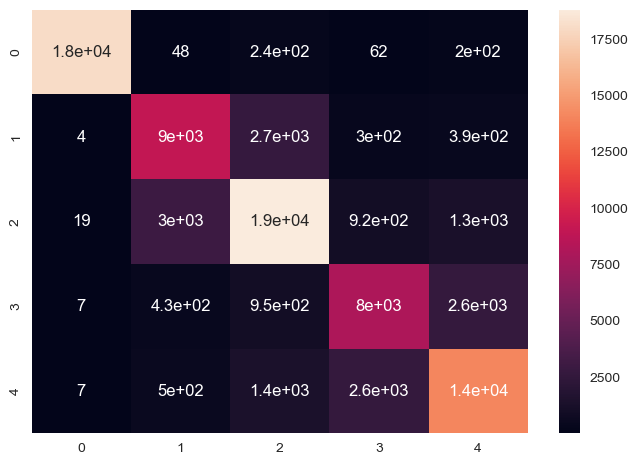

In [240]:
import seaborn as sns
sns.heatmap(cm1, annot=True)

In [238]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)

#fitting the clasifier to the data
knn.fit(X_train,y_train)

#predicted values using the knn model
y_pred=knn.predict(X_test)

#performance metrics
from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[18001    48   235    62   195]
 [    4  8980  2661   298   393]
 [   19  2953 18799   925  1253]
 [    7   429   946  8027  2610]
 [    7   500  1379  2634 14097]] 

Mean Absolute Error: 0.2773279352226721
Mean Squared Error: 0.457782406215628
Root Mean Squared Error: 0.6765961913989968 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18541
           1       0.70      0.73      0.71     12336
           2       0.78      0.78      0.78     23949
           3       0.67      0.67      0.67     12019
           4       0.76      0.76      0.76     18617

    accuracy                           0.79     85462
   macro avg       0.78      0.78      0.78     85462
weighted avg       0.80      0.79      0.80     85462

Accuracy: 0.7945519646158526


In [241]:
# trying k=1 through k=5 and record accuracy
k_range = range(1, 6)

scores = []

for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.7682361751421685, 0.7537502047693712, 0.7851559757553065, 0.7875898059956472, 0.7945519646158526]


Text(0, 0.5, 'Accuracy')

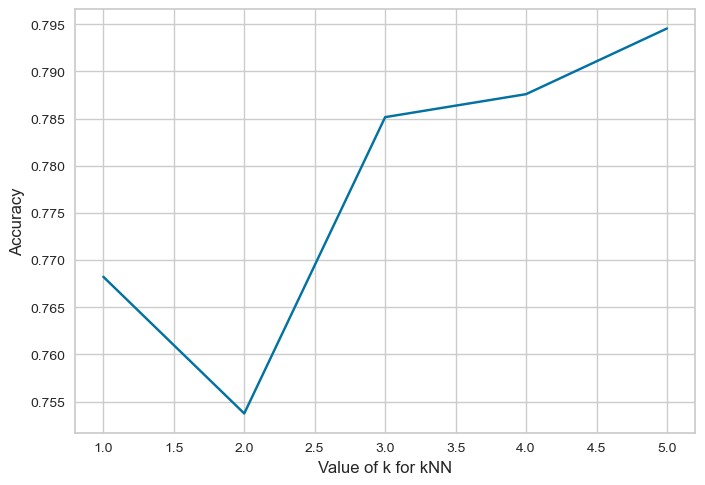

In [242]:
# plot the relationship between k values and accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

# RANDOM FOREST

In [243]:
data_classification_sample3= pd.read_csv('data_classification_sample.csv')
del data_classification_sample3['Unnamed: 0']

In [244]:
data_classification_sample3

,Family Composition,Sex,Age,Marital Status,Student,Country of Birth,Health,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,0,2,2,1,1,1,1,6,9,5,0,0
1,2,1,1,1,1,1,2,0,0,0,0,0
2,2,2,1,1,1,1,1,0,0,0,0,0
3,3,2,1,1,1,1,1,0,0,0,0,0
4,5,2,1,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170918,2,2,7,2,2,1,4,5,4,9,0,4
170919,2,2,7,2,2,1,2,5,9,10,0,4
170920,1,2,7,5,2,1,4,5,9,4,0,4
170921,2,2,6,2,2,1,3,8,9,12,0,4


In [245]:
X = data_classification_sample3.iloc[:,:-1].values    # predictor attributes
y = data_classification_sample3.iloc[:,-1].values     # target attribute

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [248]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred)
cm4

array([[18541,     0,     0,     0,     0],
       [    0,  9035,  2450,   304,   547],
       [    0,  2532, 19204,   715,  1498],
       [    0,   330,   671,  8237,  2781],
       [    0,   379,  1075,  2260, 14903]], dtype=int64)

<Axes: >

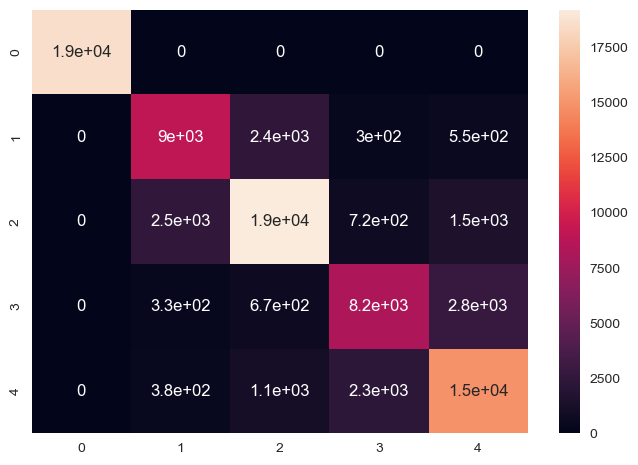

In [249]:
import seaborn as sns
sns.heatmap(cm4, annot=True)

In [247]:


from sklearn.ensemble import RandomForestClassifier

#initialise classifier
#RF = RandomForestClassifier(max_depth=10, random_state=0)
RF = RandomForestClassifier(random_state=0)

#fitting the classifier to the data
RF.fit(X_train, y_train)

#predict the values for the test set
y_pred = RF.predict(X_test)

#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[18541     0     0     0     0]
 [    0  9035  2450   304   547]
 [    0  2532 19204   715  1498]
 [    0   330   671  8237  2781]
 [    0   379  1075  2260 14903]] 

Mean Absolute Error: 0.24105450375605533
Mean Squared Error: 0.38111675364489483
Root Mean Squared Error: 0.6173465425876254 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18541
           1       0.74      0.73      0.73     12336
           2       0.82      0.80      0.81     23949
           3       0.72      0.69      0.70     12019
           4       0.76      0.80      0.78     18617

    accuracy                           0.82     85462
   macro avg       0.81      0.80      0.80     85462
weighted avg       0.82      0.82      0.82     85462

Accuracy: 0.8181413961760783


# Regression

# Data Pre Proccessing for Regression

In [361]:
data_regression= pd.read_csv('census.csv')

In [362]:
data_regression

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,-9
569736,7675184,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,-9
569737,7675176,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,-9
569738,7944614,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


In [363]:
# To see in association with which economic activity there are missing values with respect to number of hours and them replacing them with the associated mean
filtered1 = data_regression[(data_regression['Economic Activity'] == 1) & data_regression.isnull().any(axis=1)]
filtered1

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade


In [364]:
filtered2 = data_regression[(data_regression['Economic Activity'] == 2) & data_regression.isnull().any(axis=1)]
filtered2

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade


In [365]:
filtered3 = data_regression[(data_regression['Economic Activity'] == 3) & data_regression.isnull().any(axis=1)]
filtered3

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
14,7394695,E12000001,H,2,1,2,5,2,2,1,2,1,2,3,8,2,-9,NaN,4
32,7394527,E12000001,H,1,1,1,3,1,2,1,3,1,1,3,-9,-9,-9,NaN,4
36,7394898,E12000001,H,1,1,2,4,1,2,1,2,1,1,3,9,12,-9,NaN,4
37,7394524,E12000001,H,1,1,1,3,1,2,1,2,1,2,3,9,2,-9,NaN,4
45,7394537,E12000001,H,1,1,1,3,1,2,1,2,1,1,3,8,2,-9,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302224,7721273,E12000008,C,-9,1,1,6,2,2,1,2,1,2,3,1,6,-9,NaN,-9
302292,7945083,W92000004,H,2,1,1,5,2,2,1,2,1,9,3,9,2,-9,NaN,2
302297,7946167,W92000004,H,1,1,1,5,4,2,1,2,1,1,3,9,8,-9,NaN,4
302298,7946224,W92000004,H,1,1,1,3,1,2,1,2,1,1,3,7,8,-9,NaN,2


In [366]:
filtered4 = data_regression[(data_regression['Economic Activity'] == 4) & data_regression.isnull().any(axis=1)]
filtered4

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
5,7394869,E12000001,H,1,1,2,2,1,1,1,2,1,1,4,-9,-9,-9,NaN,2
6,7395019,E12000001,H,1,1,2,2,1,1,1,2,1,1,4,7,6,-9,NaN,2
38,7394525,E12000001,H,3,1,1,2,5,1,1,1,1,1,4,5,5,-9,NaN,2
160,7394667,E12000001,H,2,1,2,2,1,1,1,1,1,2,4,4,12,-9,NaN,2
231,7395323,E12000001,H,3,1,2,2,1,1,1,1,1,2,4,-9,-9,-9,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302085,7837397,E12000003,C,-9,1,1,2,1,1,1,1,1,2,4,7,4,-9,NaN,-9
302094,7837385,E12000003,C,-9,1,2,2,1,1,1,1,1,1,4,9,5,-9,NaN,-9
302095,7837384,E12000003,C,-9,1,2,2,1,1,1,2,1,1,4,9,4,-9,NaN,-9
302099,7837381,E12000003,C,-9,1,2,2,1,1,1,1,1,2,4,9,4,-9,NaN,-9


In [367]:
filtered5 = data_regression[(data_regression['Economic Activity'] == 5) & data_regression.isnull().any(axis=1)]
filtered5

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
9,7394764,E12000001,H,2,1,1,7,2,2,1,3,1,2,5,9,2,-9,NaN,4
10,7395021,E12000001,H,2,1,1,8,2,2,1,3,1,2,5,5,2,-9,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302309,7945787,W92000004,H,2,1,1,7,2,2,1,1,1,2,5,2,10,-9,NaN,1
302312,7945970,W92000004,H,2,1,2,7,2,2,1,2,1,2,5,9,10,-9,NaN,3
302313,7945274,W92000004,H,1,1,2,7,1,2,1,3,1,2,5,4,11,-9,NaN,2
302317,7944616,W92000004,H,2,1,2,7,2,2,1,3,1,2,5,7,4,-9,NaN,2


In [368]:
filtered6 = data_regression[(data_regression['Economic Activity'] == 6) & data_regression.isnull().any(axis=1)]
filtered6

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
7,7394933,E12000001,H,3,1,1,2,1,1,1,1,1,1,6,-9,-9,-9,NaN,2
28,7394743,E12000001,H,2,1,2,2,1,1,1,1,3,6,6,-9,-9,-9,NaN,2
147,7395211,E12000001,H,2,1,1,2,1,1,1,1,1,2,6,-9,-9,-9,NaN,2
195,7395071,E12000001,H,5,1,1,2,1,1,1,1,1,2,6,-9,-9,-9,NaN,2
201,7394843,E12000001,H,2,1,2,2,1,2,1,1,1,1,6,-9,-9,-9,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302290,7944333,W92000004,H,2,1,2,3,2,1,2,1,5,6,6,-9,-9,-9,NaN,2
302299,7945628,W92000004,H,2,1,2,2,1,1,2,1,1,2,6,-9,-9,-9,NaN,2
302301,7945491,W92000004,H,1,1,2,3,1,1,1,4,1,1,6,-9,-9,-9,NaN,2
302303,7945320,W92000004,H,5,1,1,2,1,1,1,1,1,1,6,-9,-9,-9,NaN,2


In [369]:
filtered7 = data_regression[(data_regression['Economic Activity'] == 7) & data_regression.isnull().any(axis=1)]
filtered7

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
48,7394912,E12000001,H,2,1,2,6,2,2,1,2,1,2,7,9,5,-9,NaN,4
61,7394553,E12000001,H,3,1,2,3,1,2,1,2,1,2,7,-9,-9,-9,NaN,4
63,7394583,E12000001,H,5,1,2,2,1,2,1,1,1,2,7,-9,-9,-9,NaN,4
65,7394589,E12000001,H,2,1,1,5,2,2,1,3,1,1,7,8,3,-9,NaN,2
76,7395306,E12000001,H,2,1,2,6,2,2,1,3,1,2,7,6,11,-9,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301939,7417693,E12000003,C,-9,1,1,6,2,2,1,1,1,1,7,9,5,-9,NaN,-9
301981,7963785,W92000004,H,2,1,1,4,2,2,1,2,1,9,7,8,2,-9,NaN,1
301994,7963897,W92000004,H,5,1,2,3,1,2,1,3,1,1,7,6,12,-9,NaN,4
302065,7842590,E12000003,C,-9,1,2,2,2,2,2,1,3,6,7,-9,-9,-9,NaN,-9


In [370]:
filtered8 = data_regression[(data_regression['Economic Activity'] == 8) & data_regression.isnull().any(axis=1)]
filtered8

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
24,7394690,E12000001,H,2,1,2,6,2,2,1,3,1,2,8,3,10,-9,NaN,3
27,7395031,E12000001,H,2,1,1,5,2,2,1,4,1,2,8,5,3,-9,NaN,3
47,7394543,E12000001,H,1,1,1,5,1,2,1,3,1,2,8,-9,-9,-9,NaN,4
53,7394603,E12000001,H,2,1,2,6,2,2,1,4,1,2,8,4,4,-9,NaN,3
59,7394623,E12000001,H,2,1,1,6,2,2,1,3,1,2,8,9,2,-9,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302223,7721309,E12000008,C,-9,1,2,6,1,2,1,2,1,1,8,-9,-9,-9,NaN,-9
302227,7683125,E12000009,C,-9,1,2,6,1,2,1,4,1,2,8,-9,-9,-9,NaN,-9
302265,7682924,E12000009,C,-9,1,2,2,1,2,1,3,1,2,8,-9,-9,-9,NaN,-9
302291,7944337,W92000004,H,5,1,2,3,1,2,1,5,1,2,8,9,5,-9,NaN,4


In [371]:
filtered9 = data_regression[(data_regression['Economic Activity'] == 9) & data_regression.isnull().any(axis=1)]
filtered9

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
23,7394762,E12000001,H,2,1,2,5,2,2,1,3,1,2,9,9,2,-9,NaN,3
31,7394740,E12000001,H,2,1,1,4,2,2,2,1,3,6,9,8,6,-9,NaN,3
35,7394495,E12000001,H,2,1,1,6,2,2,1,3,1,2,9,8,2,-9,NaN,4
70,7394624,E12000001,H,2,1,1,6,2,2,1,3,1,2,9,8,6,-9,NaN,3
114,7394518,E12000001,H,1,1,1,6,4,2,1,1,1,9,9,4,9,-9,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302242,7677642,E12000008,C,-9,1,2,8,5,2,1,2,1,2,9,-9,-9,-9,NaN,-9
302247,7675277,E12000008,C,-9,1,1,3,1,2,2,1,3,4,9,-9,-9,-9,NaN,-9
302248,7675276,E12000008,C,-9,1,1,4,2,2,2,5,3,4,9,-9,-9,-9,NaN,-9
302255,7679950,E12000008,C,-9,1,2,8,5,2,1,3,1,2,9,-9,-9,-9,NaN,-9


In [372]:
filtered_9 = data_regression[(data_regression['Economic Activity'] == -9) & data_regression.isnull().any(axis=1)]
filtered_9

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
8,7394875,E12000001,H,2,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,NaN,-9
11,7395361,E12000001,H,2,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,NaN,-9
12,7394920,E12000001,H,2,1,2,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302310,7945507,W92000004,H,2,1,2,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
302314,7945542,W92000004,H,-9,2,1,2,1,1,-9,-9,-9,-9,-9,-9,-9,-9,NaN,-9
302316,7944917,W92000004,H,2,1,1,1,1,1,1,2,1,1,-9,-9,-9,-9,NaN,-9
302318,7946558,W92000004,H,3,1,2,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [373]:
# For the economic activities 3,5,6,7,8,9,-9 we can replace the null values with zero because their status is econmically inactive.
# We need to take care of only the category 4 which has missing values and since it is a full time student the student can have a part time job.
# So we can replace the na values for category 4 of economic activity with the associated mean in the number of hours table.

In [374]:
# We can see that Economic activity has the highest correlation with No of hours attribute.
# so we can replace the missing values of no of hours with the associated mean of the economic activity,
# First we use group by and group them together with respect to their mean value.
group = data_regression.groupby('Economic Activity')['No of hours'].mean()
group

Economic Activity
-9          NaN
 1    35.861687
 2    36.619733
 3          NaN
 4    17.423952
 5          NaN
 6          NaN
 7          NaN
 8          NaN
 9          NaN
Name: No of hours, dtype: float64

In [375]:
data_regression.loc[data_regression['Economic Activity'] == 4, 'No of hours'] = 17.42


In [376]:
# Now we replace all the missing values with their respective weighted means
data_regression['No of hours'].fillna(0,inplace=True)
data_regression

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,0.0,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,0.0,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,0.0,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,0.0,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,0.0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,-9
569736,7675184,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,-9
569737,7675176,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,-9
569738,7944614,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


In [377]:
filtered10 = data_regression[(data_regression['Economic Activity'] == 4) & data_regression.isnull().any(axis=1)]
filtered10

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade


In [378]:
data_regression.isnull().sum()
# No missing values in the data set now.

Person ID                    0
Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

In [379]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_regression['Region'] = LE.fit_transform(data_regression['Region'])
data_regression['Residence Type'] = LE.fit_transform(data_regression['Residence Type'])
del data_regression['Person ID']

In [380]:
data_regression.replace(-9,0,inplace=True)

In [381]:
data_regression

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,0,1,2,1,2,6,2,2,1,2,1,2,5,8,2,0,0.0,4
1,0,1,3,1,2,1,1,2,1,2,1,1,0,0,0,0,0.0,0
2,0,1,2,1,1,7,2,2,1,1,1,2,5,8,2,0,0.0,2
3,0,1,1,1,2,6,4,2,1,3,1,2,5,9,5,0,0.0,4
4,0,1,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7,0,0,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,0
569736,7,0,0,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,0
569737,7,0,0,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,0
569738,9,1,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


In [382]:
data_regression_new=data_regression[['Region','Residence Type','Family Composition','Population Base','Sex','Age','Marital Status','Student','Country of Birth','Health','Ethnic Group','Religion','Economic Activity','Occupation','Industry','Hours worked per week','Approximated Social Grade','No of hours']]

In [383]:
data_regression_sample=data_regression_new.groupby('No of hours', group_keys=False).apply(lambda x: x.sample(frac=0.3))

In [384]:
data_regression_sample

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,No of hours
47030,0,1,2,1,2,1,1,1,1,1,1,1,0,0,0,0,0,0.0
59744,8,1,1,1,2,8,5,2,1,3,1,2,5,4,6,0,2,0.0
52829,1,1,2,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0.0
292322,9,1,3,1,2,4,4,2,1,3,1,2,3,5,5,0,4,0.0
159469,7,1,2,1,2,1,1,1,1,1,1,2,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536070,4,1,2,1,1,4,2,2,1,2,1,2,1,1,2,4,2,60.0
537812,7,1,2,1,1,5,2,2,2,3,1,1,1,1,8,4,1,60.0
567846,9,1,2,1,1,4,2,2,1,1,1,2,1,1,4,4,2,60.0
536638,8,1,2,1,1,5,2,2,1,3,1,1,2,5,3,4,3,60.0


In [385]:
data_regression_sample.to_csv('data_regression_sample.csv')

# Random Forest Regression

In [395]:
data_regression4= pd.read_csv('data_regression_sample.csv')

In [396]:
del data_regression4['Unnamed: 0']
del data_regression4['Region']
del data_regression4['Residence Type']
del data_regression4['Family Composition']
del data_regression4['Population Base']
del data_regression4['Sex']
del data_regression4['Marital Status']
del data_regression4['Country of Birth']
del data_regression4['Health']
del data_regression4['Ethnic Group']
del data_regression4['Religion']
del data_regression4['Hours worked per week']
del data_regression4['Industry']

In [397]:
data_regression4

,Age,Student,Economic Activity,Occupation,Approximated Social Grade,No of hours
0,1,1,0,0,0,0.0
1,8,2,5,4,2,0.0
2,1,1,0,0,0,0.0
3,4,2,3,5,4,0.0
4,1,1,0,0,0,0.0
...,...,...,...,...,...,...
170919,4,2,1,1,2,60.0
170920,5,2,1,1,1,60.0
170921,4,2,1,1,2,60.0
170922,5,2,2,5,3,60.0


In [398]:
X =data_regression4.iloc[:,:-1].values    # predictor attributes
y =data_regression4.iloc[:,-1].values     # target attribute

In [399]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Mean Absolute Error: 4.223584143782632
Mean Squared Error: 63.81213006285066
Root Mean Squared Error: 7.988249499286478 

R2 score: 0.8363178185169167
Adjusted R2 score: 0.8363082415310126


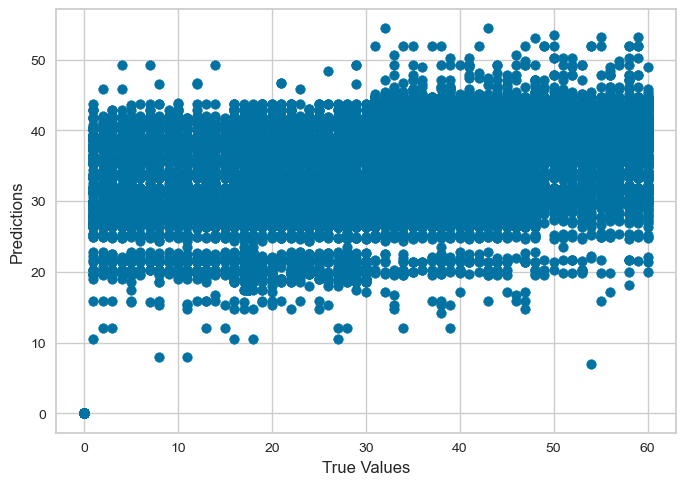

In [400]:
from sklearn.ensemble import RandomForestRegressor


# Creating a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)  # You can adjust the number of estimators

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)


# Visualizing feature importances 
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# K-Nearest Regression

In [401]:
data_regression5= pd.read_csv('data_regression_sample.csv')

In [402]:
del data_regression5['Unnamed: 0']
del data_regression5['Region']
del data_regression5['Residence Type']
del data_regression5['Family Composition']
del data_regression5['Population Base']
del data_regression5['Sex']
del data_regression5['Marital Status']
del data_regression5['Country of Birth']
del data_regression5['Health']
del data_regression5['Ethnic Group']
del data_regression5['Religion']
del data_regression5['Hours worked per week']
del data_regression5['Industry']

In [403]:
X =data_regression5.iloc[:,:-1].values    # predictor attributes
y =data_regression5.iloc[:,-1].values     # target attribute

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Mean Absolute Error: 4.359548462084513
Mean Squared Error: 67.0684643976504
Root Mean Squared Error: 8.189533832743498 

R2 score: 0.8279651133645685
Adjusted R2 score: 0.8279550476648729


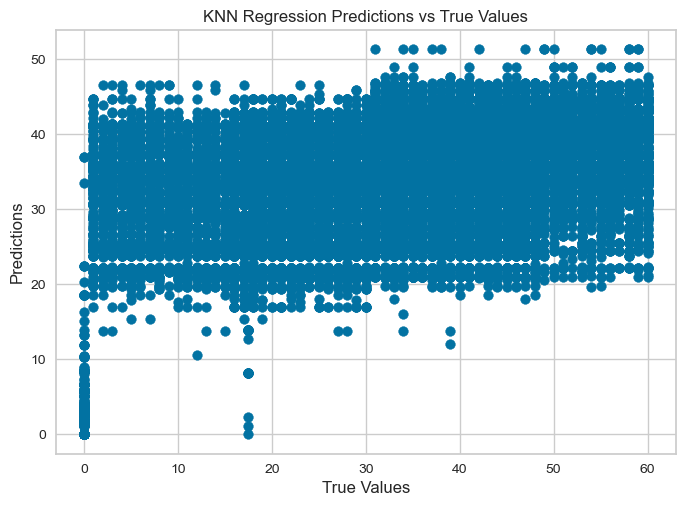

In [405]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=15)  
# Fitting the model to the training data
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)



# Visualizing predictions 
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Regression Predictions vs True Values')
plt.show()


# Association Rule Mining 

In [414]:
data_association= pd.read_csv('data_categorical.csv')

In [415]:
data_association

,Unnamed: 0,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,0,7394816,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,55 to 64,Married,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, plant and machine operatives",Mining and quarrying,No Code,NaN,DE
1,1,7394832,North East,Not resident in a communal establishment,Cohabiting couple family,Usual resident,Female,0 to 15,Single,No,UK,Good health,White,No religion,No Code,No Code,No code,No Code,NaN,No Code
2,2,7394719,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,65 to 74,Married,No,UK,Very good health,White,Christian,Economically inactive: Retired,"Process, plant and machine operatives",Mining and quarrying,No Code,NaN,C1
3,3,7394840,North East,Not resident in a communal establishment,Not in a family,Usual resident,Female,55 to 64,Divorced,No,UK,Fair health,White,Christian,Economically inactive: Retired,Elementary occupations,Accomodation and food,No Code,NaN,DE
4,4,7394711,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,0 to 15,Single,Yes,UK,Very good health,White,No religion,No Code,No Code,No code,No Code,NaN,No Code
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,569735,7680019,South East,Resident in a communal establishment,No code required,Usual resident,Male,16 to 24,Single,No,Non-UK,Very good health,White,Christian,Economically active:Employee,Associate professional and technical occupations,Public administration and defence,Full time:>49 hours,52.0,No Code
569736,569736,7675184,South East,Resident in a communal establishment,No code required,Usual resident,Male,25 to 34,Single,No,Non-UK,Good health,Mixed,No religion,Economically active:Employee,"Managers, directors and senior officials",Accomodation and food,Full time:>49 hours,55.0,No Code
569737,569737,7675176,South East,Resident in a communal establishment,No code required,Usual resident,Female,45 to 54,Married,No,UK,Very good health,White,Christian,Economically active:Self-employed,"Managers, directors and senior officials",Real estate activities,Full time:>49 hours,49.0,No Code
569738,569738,7944614,Wales,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,55 to 64,Married,No,UK,Fair health,White,No religion,Economically active:Employee,"Caring, leisure and other service occupations",Education,Full time:>49 hours,53.0,C2


In [416]:
# For the economic activities 3,5,6,7,8,9,-9 we can replace the null values with zero because their status is econmically inactive.
# We need to take care of only the category 4 which has missing values and since it is a full time student the student can have a part time job.
# So we can replace the na values for category 4 of economic activity with the associated mean in the number of hours table.

In [417]:
# We can see that Economic activity has the highest correlation with No of hours attribute.
# so we can replace the missing values of no of hours with the associated mean of the economic activity,
# First we use group by and group them together with respect to their mean value.
group1 = data_association.groupby('Economic Activity')['No of hours'].mean()
group1

Economic Activity
Economically active: Full-time student                 17.423952
Economically active: Unemployed                              NaN
Economically active:Employee                           35.861687
Economically active:Self-employed                      36.619733
Economically inactive: Looking after home or family          NaN
Economically inactive: Retired                               NaN
Economically inactive: Student                               NaN
Economically inactive:Other                                  NaN
Economically inactive:disabled                               NaN
No Code                                                      NaN
Name: No of hours, dtype: float64

In [418]:
data_association.loc[data_association['Economic Activity'] == 4, 'No of hours'] = 17.42

In [419]:
# Now we replace all the missing values with their respective weighted means
data_association['No of hours'].fillna(0,inplace=True)
data_association

,Unnamed: 0,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,0,7394816,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,55 to 64,Married,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, plant and machine operatives",Mining and quarrying,No Code,0.0,DE
1,1,7394832,North East,Not resident in a communal establishment,Cohabiting couple family,Usual resident,Female,0 to 15,Single,No,UK,Good health,White,No religion,No Code,No Code,No code,No Code,0.0,No Code
2,2,7394719,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,65 to 74,Married,No,UK,Very good health,White,Christian,Economically inactive: Retired,"Process, plant and machine operatives",Mining and quarrying,No Code,0.0,C1
3,3,7394840,North East,Not resident in a communal establishment,Not in a family,Usual resident,Female,55 to 64,Divorced,No,UK,Fair health,White,Christian,Economically inactive: Retired,Elementary occupations,Accomodation and food,No Code,0.0,DE
4,4,7394711,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,0 to 15,Single,Yes,UK,Very good health,White,No religion,No Code,No Code,No code,No Code,0.0,No Code
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,569735,7680019,South East,Resident in a communal establishment,No code required,Usual resident,Male,16 to 24,Single,No,Non-UK,Very good health,White,Christian,Economically active:Employee,Associate professional and technical occupations,Public administration and defence,Full time:>49 hours,52.0,No Code
569736,569736,7675184,South East,Resident in a communal establishment,No code required,Usual resident,Male,25 to 34,Single,No,Non-UK,Good health,Mixed,No religion,Economically active:Employee,"Managers, directors and senior officials",Accomodation and food,Full time:>49 hours,55.0,No Code
569737,569737,7675176,South East,Resident in a communal establishment,No code required,Usual resident,Female,45 to 54,Married,No,UK,Very good health,White,Christian,Economically active:Self-employed,"Managers, directors and senior officials",Real estate activities,Full time:>49 hours,49.0,No Code
569738,569738,7944614,Wales,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,55 to 64,Married,No,UK,Fair health,White,No religion,Economically active:Employee,"Caring, leisure and other service occupations",Education,Full time:>49 hours,53.0,C2


In [420]:
data_association.isnull().sum()

Unnamed: 0                   0
Person ID                    0
Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

In [421]:
data_association = data_association[~data_association.apply(lambda row: any(row == 'No Code'), axis=1)]

In [422]:
data_association

,Unnamed: 0,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,302321,7394645,North East,Not resident in a communal establishment,Lone parent family (female head),Usual resident,Female,45 to 54,Divorced,No,UK,Fair health,White,Christian,Economically active:Self-employed,Sales and customer service occupations,Financial and insurance,Part time:<15 hours,2.0,DE
302322,302322,7394688,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,16 to 24,Single,Yes,UK,Very good health,White,Not stated,Economically active: Full-time student,Sales and customer service occupations,Wholesale and retail Trade,Part time:<15 hours,1.0,C1
302323,302323,7394756,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,45 to 54,Married,No,UK,Fair health,White,No religion,Economically active:Employee,Elementary occupations,Public administration and defence,Part time:<15 hours,10.0,DE
302324,302324,7394737,North East,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Female,55 to 64,Married,No,UK,Very good health,White,Christian,Economically active:Employee,Elementary occupations,Human health and social work,Part time:<15 hours,3.0,DE
302325,302325,7394536,North East,Not resident in a communal establishment,Lone parent family (female head),Usual resident,Female,55 to 64,Separated,No,UK,Good health,White,No religion,Economically active:Employee,Elementary occupations,Education,Part time:<15 hours,8.0,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569724,569724,7964119,Wales,Not resident in a communal establishment,Lone parent family (female head),Usual resident,Female,35 to 44,Married,No,UK,Good health,White,No religion,Economically active:Self-employed,"Managers, directors and senior officials","Agriculture, forestry and fishing",Full time:>49 hours,54.0,C1
569725,569725,7963949,Wales,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,16 to 24,Single,No,UK,Very good health,White,Not stated,Economically active:Employee,"Managers, directors and senior officials",Construction,Full time:>49 hours,58.0,C1
569726,569726,7963673,Wales,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,35 to 44,Married,No,UK,Good health,White,No religion,Economically active:Employee,Elementary occupations,Transport and storage,Full time:>49 hours,56.0,C2
569738,569738,7944614,Wales,Not resident in a communal establishment,Married/same-sex civil partnership couple family,Usual resident,Male,55 to 64,Married,No,UK,Fair health,White,No religion,Economically active:Employee,"Caring, leisure and other service occupations",Education,Full time:>49 hours,53.0,C2


In [423]:
del data_association['Unnamed: 0']
del data_association['Person ID']
del data_association['Family Composition']
del data_association['Residence Type']
del data_association['Ethnic Group']
del data_association['Country of Birth']
del data_association['Religion']

In [424]:
data_association

,Region,Population Base,Sex,Age,Marital Status,Student,Health,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,North East,Usual resident,Female,45 to 54,Divorced,No,Fair health,Economically active:Self-employed,Sales and customer service occupations,Financial and insurance,Part time:<15 hours,2.0,DE
302322,North East,Usual resident,Female,16 to 24,Single,Yes,Very good health,Economically active: Full-time student,Sales and customer service occupations,Wholesale and retail Trade,Part time:<15 hours,1.0,C1
302323,North East,Usual resident,Female,45 to 54,Married,No,Fair health,Economically active:Employee,Elementary occupations,Public administration and defence,Part time:<15 hours,10.0,DE
302324,North East,Usual resident,Female,55 to 64,Married,No,Very good health,Economically active:Employee,Elementary occupations,Human health and social work,Part time:<15 hours,3.0,DE
302325,North East,Usual resident,Female,55 to 64,Separated,No,Good health,Economically active:Employee,Elementary occupations,Education,Part time:<15 hours,8.0,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569724,Wales,Usual resident,Female,35 to 44,Married,No,Good health,Economically active:Self-employed,"Managers, directors and senior officials","Agriculture, forestry and fishing",Full time:>49 hours,54.0,C1
569725,Wales,Usual resident,Male,16 to 24,Single,No,Very good health,Economically active:Employee,"Managers, directors and senior officials",Construction,Full time:>49 hours,58.0,C1
569726,Wales,Usual resident,Male,35 to 44,Married,No,Good health,Economically active:Employee,Elementary occupations,Transport and storage,Full time:>49 hours,56.0,C2
569738,Wales,Usual resident,Male,55 to 64,Married,No,Fair health,Economically active:Employee,"Caring, leisure and other service occupations",Education,Full time:>49 hours,53.0,C2


In [425]:
data_association = data_association.sample(frac=0.03, replace=False, random_state=1)
data_association.shape

(7955, 13)

In [426]:
data_list = []
for row in range(0, 7955):
    data_list.append([str(data_association.values[row,column]) for column in range(0, 13)])
    
rules = apriori(data_list, min_support=0.2, min_confidence=0.25, min_length=2)
results = list(rules)

In [427]:
print(results)

[RelationRecord(items=frozenset({'C1'}), support=0.350345694531741, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C1'}), confidence=0.350345694531741, lift=1.0)]), RelationRecord(items=frozenset({'Economically active:Employee'}), support=0.8049025769956003, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Economically active:Employee'}), confidence=0.8049025769956003, lift=1.0)]), RelationRecord(items=frozenset({'Female'}), support=0.4711502199874293, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Female'}), confidence=0.4711502199874293, lift=1.0)]), RelationRecord(items=frozenset({'Full time:31-48 hours'}), support=0.5642991829038341, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Full time:31-48 hours'}), confidence=0.5642991829038341, lift=1.0)]), RelationRecord(items=frozenset({'Good health'}), support=0.3928346951602766, ordered_statistics

In [428]:
#Putting the results into a dataframe to have the rules listed in a table
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

#Sorting resulted dataframe by Lift
df.sort_values(by ='Lift', ascending = False, inplace = True)

In [429]:
df.reset_index(drop=True, inplace=True)

In [430]:
df.shape

(1070, 6)

In [431]:
df.head(50)

,Items,Antecedent,Consequent,Support,Confidence,Lift
0,"{C1, Female}",{C1},{Female},0.208171,0.594187,1.261142
1,"{Usual resident, C1, Female}",{C1},"{Usual resident, Female}",0.208171,0.594187,1.261142
2,"{C1, Female}",{Female},{C1},0.208171,0.441836,1.261142
3,"{Usual resident, C1, Female}","{Usual resident, Female}",{C1},0.208171,0.441836,1.261142
4,"{Usual resident, C1, Female}",{Female},"{Usual resident, C1}",0.208171,0.441836,1.261142
5,"{Usual resident, C1, Female}","{Usual resident, C1}",{Female},0.208171,0.594187,1.261142
6,"{Full time:31-48 hours, No, Economically activ...","{Economically active:Employee, Male}","{Full time:31-48 hours, No}",0.279070,0.692884,1.238906
7,"{Full time:31-48 hours, Usual resident, No, Ec...","{Usual resident, Economically active:Employee,...","{Full time:31-48 hours, No}",0.279070,0.692884,1.238906
8,"{Full time:31-48 hours, Usual resident, No, Ec...","{Economically active:Employee, Male}","{Full time:31-48 hours, Usual resident, No}",0.279070,0.692884,1.238906
9,"{Full time:31-48 hours, Usual resident, No, Ec...","{Full time:31-48 hours, No}","{Usual resident, Economically active:Employee,...",0.279070,0.498989,1.238906


In [432]:
above_1 = df[df["Lift"] > 1]

In [433]:
above_1.shape

(579, 6)

In [434]:
pd.set_option('display.max_rows',None)

In [435]:
above_1


,Items,Antecedent,Consequent,Support,Confidence,Lift
0,"{C1, Female}",{C1},{Female},0.208171,0.594187,1.261142
1,"{Usual resident, C1, Female}",{C1},"{Usual resident, Female}",0.208171,0.594187,1.261142
2,"{C1, Female}",{Female},{C1},0.208171,0.441836,1.261142
3,"{Usual resident, C1, Female}","{Usual resident, Female}",{C1},0.208171,0.441836,1.261142
4,"{Usual resident, C1, Female}",{Female},"{Usual resident, C1}",0.208171,0.441836,1.261142
5,"{Usual resident, C1, Female}","{Usual resident, C1}",{Female},0.208171,0.594187,1.261142
6,"{Full time:31-48 hours, No, Economically activ...","{Economically active:Employee, Male}","{Full time:31-48 hours, No}",0.279070,0.692884,1.238906
7,"{Full time:31-48 hours, Usual resident, No, Ec...","{Usual resident, Economically active:Employee,...","{Full time:31-48 hours, No}",0.279070,0.692884,1.238906
8,"{Full time:31-48 hours, Usual resident, No, Ec...","{Economically active:Employee, Male}","{Full time:31-48 hours, Usual resident, No}",0.279070,0.692884,1.238906
9,"{Full time:31-48 hours, Usual resident, No, Ec...","{Full time:31-48 hours, No}","{Usual resident, Economically active:Employee,...",0.279070,0.498989,1.238906


In [245]:
#8,79,104,141,153,189,325,403,486,1

# Clustering

# Hierarchical Clustering 

In [443]:
data_clus2 = pd.read_csv('census.csv')

In [444]:
del data_clus2['No of hours']
del data_clus2['Person ID']

In [445]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_clus2['Region'] = LE.fit_transform(data_clus2['Region'])
data_clus2['Residence Type'] = LE.fit_transform(data_clus2['Residence Type'])

In [446]:
#standardise the data 
scaler = StandardScaler()
data_clustee = scaler.fit_transform(data_clus.values)
data_clustr = pd.DataFrame(data_clustee, index=data_clus2.index, columns=data_clus2.columns)
data_clustr.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
count,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05
mean,-8.700014e-17,1.835783e-16,1.141378e-16,6.138898e-16,8.460564e-17,1.301510e-16,-5.492383e-17,1.995416e-16,-1.077525e-16,-6.983956e-18,-7.383040e-17,7.881894e-17,6.185790e-18,-4.190374e-17,-3.511932e-17,-3.001106e-16,1.995416e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.793840e+00,-7.244075e+00,-4.668445e+00,-1.177643e-01,-1.015217e+00,-1.342053e+00,-7.610541e-01,-1.871512e+00,-8.686402e+00,-7.169608e+00,-7.322055e+00,-4.580464e+00,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00
25%,-1.027515e+00,1.380438e-01,-5.032385e-03,-1.177643e-01,-1.015217e+00,-8.914996e-01,-7.610541e-01,5.343274e-01,-1.408145e-02,-4.428388e-01,-1.374042e-01,-5.693336e-01,5.971040e-02,-1.570265e+00,-1.548848e+00,-9.363674e-01,1.986311e-01
50%,1.219718e-01,1.380438e-01,-5.032385e-03,-1.177643e-01,9.850107e-01,9.607496e-03,1.278190e-01,5.343274e-01,-1.408145e-02,2.298382e-01,-1.374042e-01,-1.682205e-01,5.971040e-02,2.697128e-01,2.081590e-01,-9.363674e-01,4.042795e-01
75%,8.882965e-01,1.380438e-01,4.189142e-01,-1.177643e-01,9.850107e-01,9.107146e-01,1.278190e-01,5.343274e-01,-1.408145e-02,2.298382e-01,-1.374042e-01,-1.682205e-01,8.193773e-01,7.297072e-01,7.487766e-01,1.101838e+00,6.099279e-01
max,1.654621e+00,1.380438e-01,1.690754e+00,1.245627e+01,9.850107e-01,1.811822e+00,2.794438e+00,5.343274e-01,8.531507e-01,2.247869e+00,2.736456e+00,2.639571e+00,1.579044e+00,1.189702e+00,1.289394e+00,1.271688e+00,8.155763e-01


In [447]:
data_clus3=data_clustr.groupby('Approximated Social Grade', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [448]:
######################################################
###             Hierarchical Clustering            ###
######################################################

from sklearn.cluster import AgglomerativeClustering

X = data_clus3.sample(frac=0.1, replace=False, random_state=0)

# setting distance_threshold=0 ensures we compute the full tree.
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#change the parameters
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

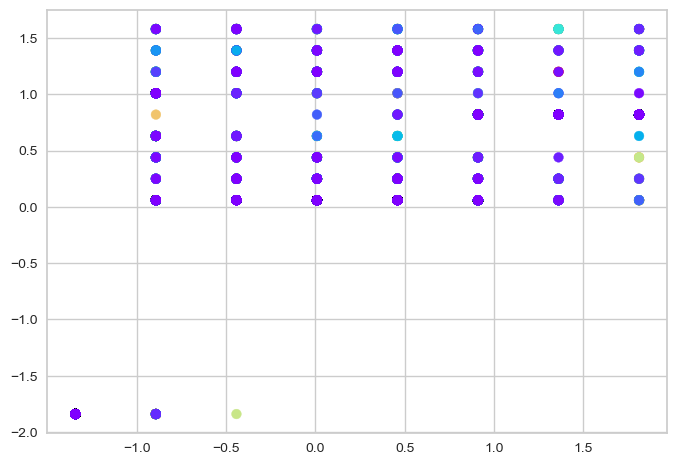

In [449]:
plt.scatter(X['Age'],X['Economic Activity'], c=cluster.labels_, cmap='rainbow')

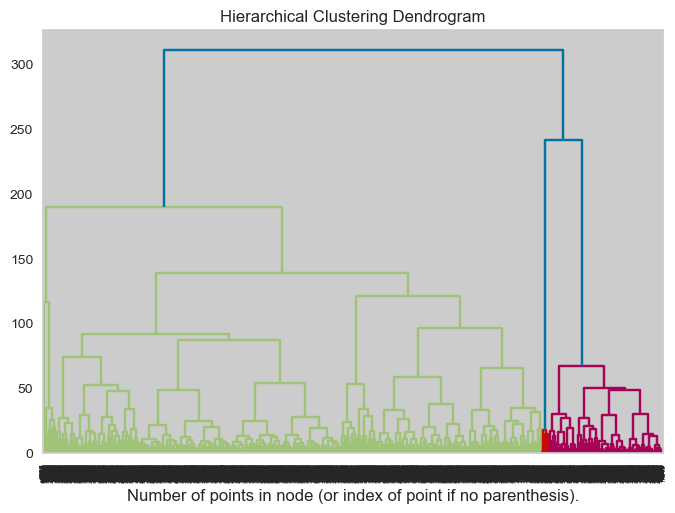

In [450]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [451]:
cluster.labels_

array([9322, 9049, 7999, ...,    4,    1,    0], dtype=int64)

In [452]:
#change the parameters
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [453]:
#append dataframe with cluster number
X['cluster_no'] = cluster.labels_

In [454]:
X.head()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,cluster_no
341774,-0.644353,0.138044,-0.005032,-0.117764,0.985011,0.460161,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,0.059710,0.883039,0.208159,0.931987,0.815576,1
473378,-1.410677,0.138044,-0.005032,-0.117764,0.985011,0.009607,0.127819,0.534327,-0.014081,-0.442839,-0.137404,-0.168221,0.059710,0.269713,0.613622,1.101838,0.198631,1
158794,0.888297,0.138044,-0.428979,-0.117764,0.985011,0.460161,0.127819,0.534327,-0.014081,0.902515,-0.137404,-0.569334,1.389128,-1.570265,-1.548848,-0.936367,0.815576,1
293860,-1.410677,-7.244075,-4.668445,-0.117764,-1.015217,-0.891500,-0.761054,-1.871512,-0.014081,0.229838,-0.137404,-0.569334,1.009294,0.729707,1.289394,-0.936367,-1.857853,1
491177,-0.261190,0.138044,0.842861,-0.117764,-1.015217,-0.440946,-0.761054,0.534327,-0.014081,-0.442839,1.299526,1.436232,0.059710,0.423044,0.613622,1.101838,0.404280,1


In [455]:
X.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,cluster_no
count,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000,11395.000000
mean,-0.004830,0.000702,0.000213,-0.010728,0.000080,0.007631,0.000124,0.014945,0.019101,0.016494,0.023754,0.015844,0.008194,0.013860,0.014542,0.008490,0.005652,0.806757
std,0.999963,0.997546,0.980876,0.972628,1.000043,0.995923,0.997180,0.989888,0.932704,0.958168,0.961933,0.989322,0.995918,0.996276,0.996207,0.999664,0.993878,0.394859
min,-1.793840,-7.244075,-4.668445,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-8.686402,-7.169608,-7.322055,-4.580464,-1.839457,-1.570265,-1.548848,-0.936367,-1.857853,0.000000
25%,-1.027515,0.138044,-0.005032,-0.117764,-1.015217,-0.891500,-0.761054,0.534327,-0.014081,-0.442839,-0.137404,-0.569334,0.059710,-1.570265,-1.548848,-0.936367,0.198631,1.000000
50%,0.121972,0.138044,-0.005032,-0.117764,0.985011,0.009607,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,0.059710,0.269713,0.208159,-0.936367,0.404280,1.000000
75%,0.888297,0.138044,0.418914,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,0.819377,0.729707,0.748777,1.101838,0.609928,1.000000
max,1.654621,0.138044,1.690754,12.456269,0.985011,1.811822,2.794438,0.534327,0.853151,2.247869,2.736456,2.639571,1.579044,1.189702,1.289394,1.271688,0.815576,1.000000


In [456]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")

In [457]:
cluster1.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,cluster_no
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2.202000e+03,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2.202000e+03,2.202000e+03,2.202000e+03,2.202000e+03,2.202000e+03,2202.0
mean,0.013392,0.131339,0.102398,0.202011,-0.054163,-1.321592,-7.610541e-01,-1.315394,-0.427612,-0.657289,-0.194503,-0.152737,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00,0.0
std,0.985871,0.222428,1.239111,1.381682,0.999578,0.094808,1.432513e-14,1.014461,1.957109,1.570168,1.814017,1.374786,5.730052e-14,2.798398e-14,3.753406e-14,1.865598e-14,5.596795e-14,0.0
min,-1.793840,-7.244075,-4.668445,-0.117764,-1.015217,-1.342053,-7.610541e-01,-1.871512,-8.686402,-7.169608,-7.322055,-4.580464,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00,0.0
25%,-1.027515,0.138044,-0.005032,-0.117764,-1.015217,-1.342053,-7.610541e-01,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00,0.0
50%,0.121972,0.138044,-0.005032,-0.117764,-1.015217,-1.342053,-7.610541e-01,-1.871512,-0.014081,-0.442839,-0.137404,-0.168221,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00,0.0
75%,0.888297,0.138044,0.418914,-0.117764,0.985011,-1.342053,-7.610541e-01,-1.871512,-0.014081,-0.442839,-0.137404,-0.168221,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00,0.0
max,1.654621,0.138044,1.690754,6.169252,0.985011,-0.440946,-7.610541e-01,0.534327,0.853151,2.247869,2.736456,2.639571,-1.839457e+00,-1.570265e+00,-1.548848e+00,-9.363674e-01,-1.857853e+00,0.0


In [458]:
cluster2.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade,cluster_no
count,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.000000,9193.0
mean,-0.009194,-0.030589,-0.024263,-0.061685,0.013073,0.326019,0.182449,0.333601,0.126102,0.177886,0.076033,0.056225,0.450762,0.393305,0.389022,0.234812,0.452017,1.0
std,1.003313,1.102980,0.906560,0.837898,0.999771,0.838260,1.029822,0.665337,0.319267,0.642553,0.587279,0.867307,0.464511,0.696557,0.710212,0.986728,0.439622,0.0
min,-1.793840,-7.244075,-4.668445,-0.117764,-1.015217,-1.342053,-0.761054,-1.871512,-0.014081,-0.442839,-0.137404,-0.569334,-1.839457,-1.570265,-1.548848,-0.936367,-1.857853,1.0
25%,-1.027515,0.138044,-0.005032,-0.117764,-1.015217,-0.440946,-0.761054,0.534327,-0.014081,-0.442839,-0.137404,-0.168221,0.059710,0.116381,0.073005,-0.936367,0.404280,1.0
50%,0.121972,0.138044,-0.005032,-0.117764,0.985011,0.460161,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,0.249627,0.423044,0.478468,0.931987,0.404280,1.0
75%,0.888297,0.138044,-0.005032,-0.117764,0.985011,0.910715,0.127819,0.534327,-0.014081,0.229838,-0.137404,-0.168221,0.819377,0.883039,0.883931,1.101838,0.815576,1.0
max,1.654621,0.138044,1.690754,12.456269,0.985011,1.811822,2.794438,0.534327,0.853151,2.247869,2.736456,2.639571,1.579044,1.189702,1.289394,1.271688,0.815576,1.0


In [459]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())

In [460]:
cluster1_mean

array([ 0.01339178,  0.13133892,  0.10239822,  0.20201128, -0.05416321,
       -1.32159199, -0.76105408, -1.31539369, -0.42761174, -0.65728893,
       -0.19450292, -0.15273703, -1.83945693, -1.5702646 , -1.54884828,
       -0.93636736, -1.85785266,  0.        ])

In [461]:
cluster1_mean_p1 = cluster1_mean[:9]
cluster2_mean_p1 = cluster2_mean[:9]

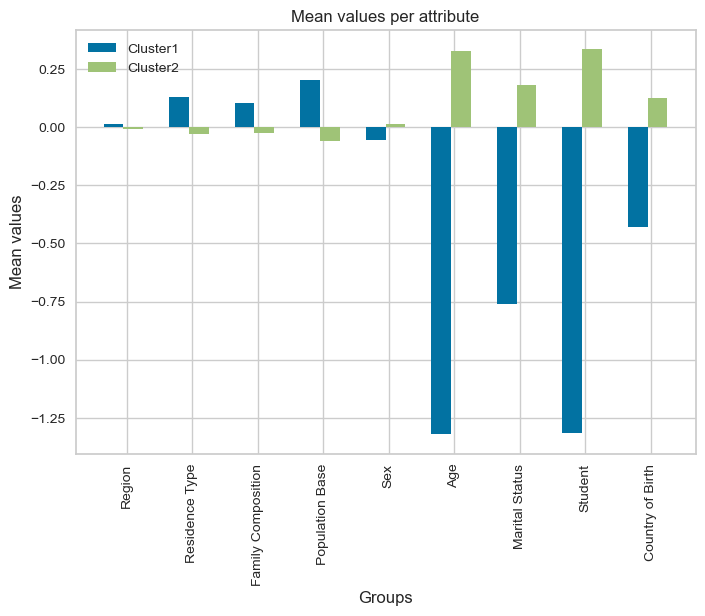

In [462]:
X = cluster1.keys()[:9]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()



In [463]:
cluster1.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'Approximated Social Grade',
       'cluster_no'],
      dtype='object')

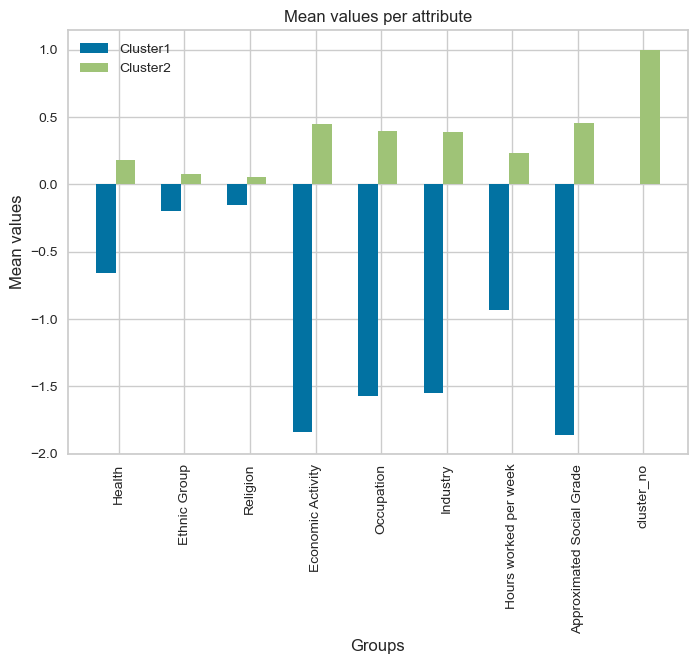

In [464]:
cluster1_mean_p2 = cluster1_mean[9:]
cluster2_mean_p2 = cluster2_mean[9:]

X = cluster1.keys()[9:]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')

  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

# K - Modes

In [155]:
data_clus4 = pd.read_csv('census.csv')
data_clus4

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,-9
569736,7675184,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,-9
569737,7675176,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,-9
569738,7944614,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


In [156]:
del data_clus4['No of hours']
del data_clus4['Person ID']
del data_clus4['Region']
del data_clus4['Residence Type']
del data_clus4['Family Composition']
del data_clus4['Population Base']
del data_clus4['Marital Status']
del data_clus4['Ethnic Group']
del data_clus4['Religion']
del data_clus4['Occupation']
del data_clus4['Hours worked per week']

In [157]:
data_clus5=data_clus4.groupby('Economic Activity', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [135]:
pip install kmodes


In [158]:
from kmodes.kmodes import KModes

# Initialize K-Modes with the desired number of clusters
k = 4
k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)

# Fit the model to the data
clusters = k_modes.fit_predict(data_clus5)

# Display cluster centroids (modes)
print("Cluster Centroids:")
print(k_modes.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9493, cost: 161323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18299, cost: 165954.0
Run 2, iteration: 2/100, moves: 858, cost: 165954.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15899, cost: 167122.0
Run 3, iteration: 2/100, moves: 2283, cost: 167122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23086, cost: 166850.0
Run 4, iteration: 2/100, moves: 8709, cost: 164601.0
Run 4, iteration: 3/100, moves: 4313, cost: 164601.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15029, cost: 173233.0
Run 5, iteration: 2/100, moves: 4815, cost: 173233.0
Best run was number 1
Cluster Centroids:
[[ 2  5  2  1  2  1 11  2]

In [159]:
k_modes.labels_

array([3, 3, 3, ..., 0, 1, 2], dtype=uint16)

In [160]:
#append dataframe with cluster number
data_clus5['cluster'] = k_modes.labels_

In [161]:
k_modes.labels_ == 0

array([False, False, False, ...,  True, False, False])

In [162]:
#view proterties of each cluster
cluster1=data_clus5.query("cluster == 0")
cluster2=data_clus5.query("cluster == 1")
cluster1=data_clus5.query("cluster == 2")
cluster2=data_clus5.query("cluster == 3")

In [163]:
k_modes.cluster_centroids_

array([[ 2,  5,  2,  1,  2,  1, 11,  2],
       [ 2,  6,  2,  1,  2,  5,  4,  4],
       [ 1,  3,  2,  1,  1,  1,  4,  3],
       [ 2,  1,  1,  1,  1, -9, -9, -9]], dtype=int64)

In [164]:
cluster1_mode = k_modes.cluster_centroids_[0]
cluster2_mode = k_modes.cluster_centroids_[1]
cluster3_mode = k_modes.cluster_centroids_[2]
cluster4_mode = k_modes.cluster_centroids_[3]

In [165]:
cluster1_mode_p1= cluster1_mode[:]

In [166]:
cluster2_mode_p2= cluster2_mode[:]

In [167]:
cluster3_mode_p3= cluster3_mode[:]

In [168]:
cluster4_mode_p4= cluster4_mode[:]

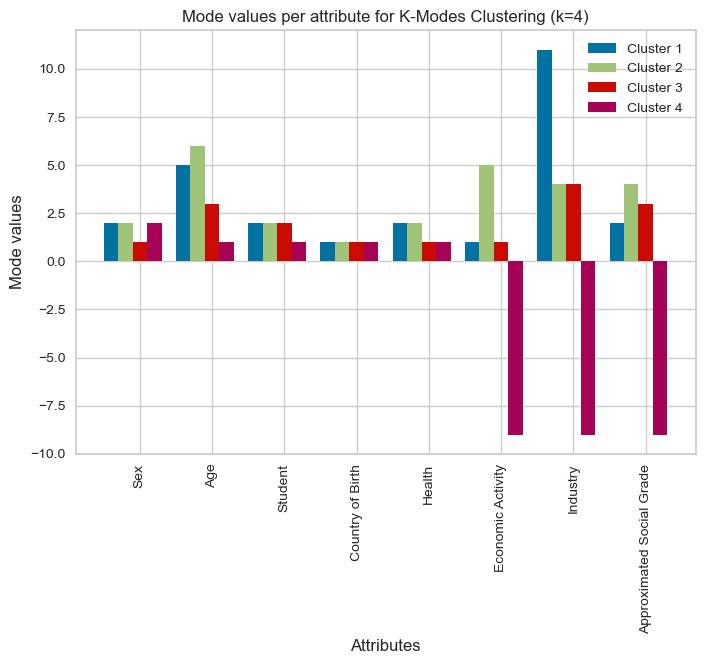

In [176]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt

data = data_clus5

# Initializing K-Modes with 4 clusters
k = 4
k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)

# Fitting the model to the data
clusters = k_modes.fit_predict(data)

cluster_means = [cluster1_mode_p1, cluster2_mode_p2, cluster3_mode_p3, cluster4_mode_p4]

X = data.columns[:-1] 

# Setting up the bar chart
X_axis = np.arange(len(X))

# Plotting mode values for each cluster
for i in range(k):
    plt.bar(X_axis + 0.2 * (i - k // 2), cluster_means[i], 0.2, label=f'Cluster {i + 1}')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("Mode values")
plt.title("Mode values per attribute for K-Modes Clustering (k=4)")
plt.legend()
plt.show()

